# 연구과제

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

from sklearn.linear_model import SGDClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계,머신러닝/E.InferentialStatistics/수업자료/winequality.xlsx',categories=['type'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  6497 non-null   category
 1   fixed acidity         6487 non-null   float64 
 2   volatile acidity      6489 non-null   float64 
 3   citric acid           6494 non-null   float64 
 4   residual sugar        6495 non-null   float64 
 5   chlorides             6495 non-null   float64 
 6   free sulfur dioxide   6497 non-null   float64 
 7   total sulfur dioxide  6497 non-null   float64 
 8   density               6497 non-null   float64 
 9   pH                    6488 non-null   float64 
 10  sulphates             6493 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality               6497 non-null   int64   
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB
None

데이터프레임 상위 5개 행
+----+--------+-----------

> 기본 전처리: null, 이상치 확인 

In [3]:
origin.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

> null값이 많이 없으므로 제거

In [4]:
df = origin.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

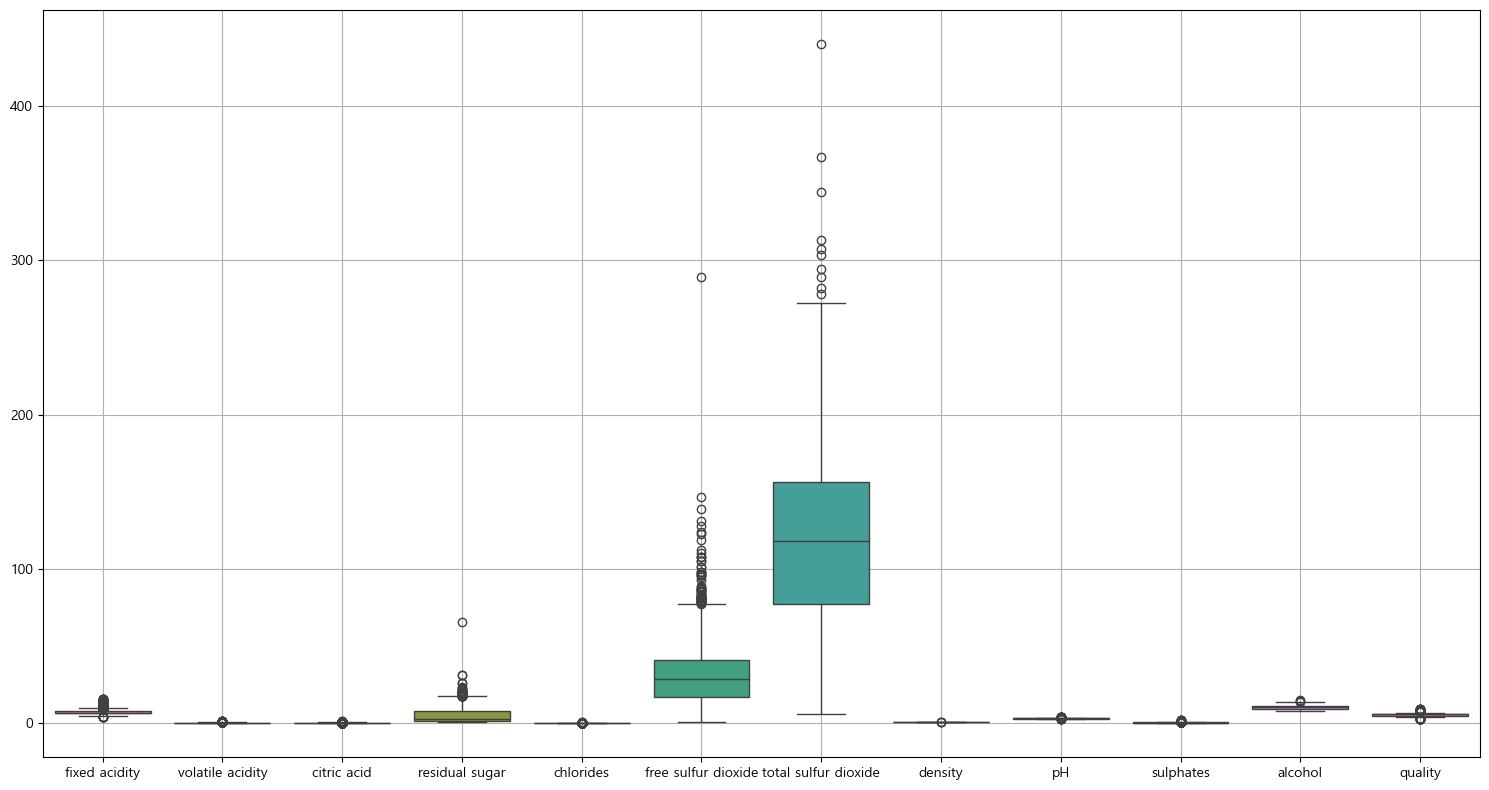

In [5]:
# 이상치 확인
my_boxplot(df,figsize=(15,8))

> 데이터 범위가 달라 정규화가 필요해 보임, 이상치는 허용함 

In [6]:
# 품종 라벨링
df = my_labelling(df, 'type')
df.dtypes

type                      int32
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='quality', scalling=True, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5170, 12), (1293, 12), (5170,), (1293,))

SGDClassifier: {'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
[교차검증 TOP5]
+-----+------------+------------+----------------+-----------------+--------+---------+-------------------+
|     | penalty    |   max_iter | loss           | learning_rate   |   eta0 |   alpha |   mean_test_score |
|-----+------------+------------+----------------+-----------------+--------+---------+-------------------|
| 477 | elasticnet |       3000 | modified_huber | adaptive        |    0.1 |   0.001 |          0.533075 |
| 468 | elasticnet |       4000 | modified_huber | adaptive        |    0.1 |   0.001 |          0.533075 |
| 205 | l2         |       5000 | modified_huber | invscaling      |    0.1 |     0.1 |          0.532108 |
| 333 | l2         |       4000 | modified_huber | invscaling     

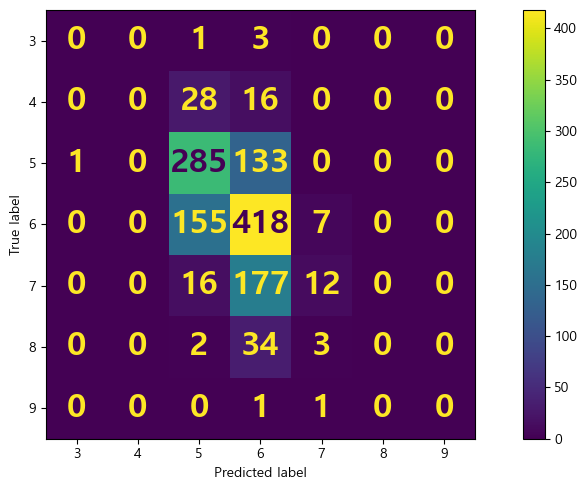


[Roc Curve]


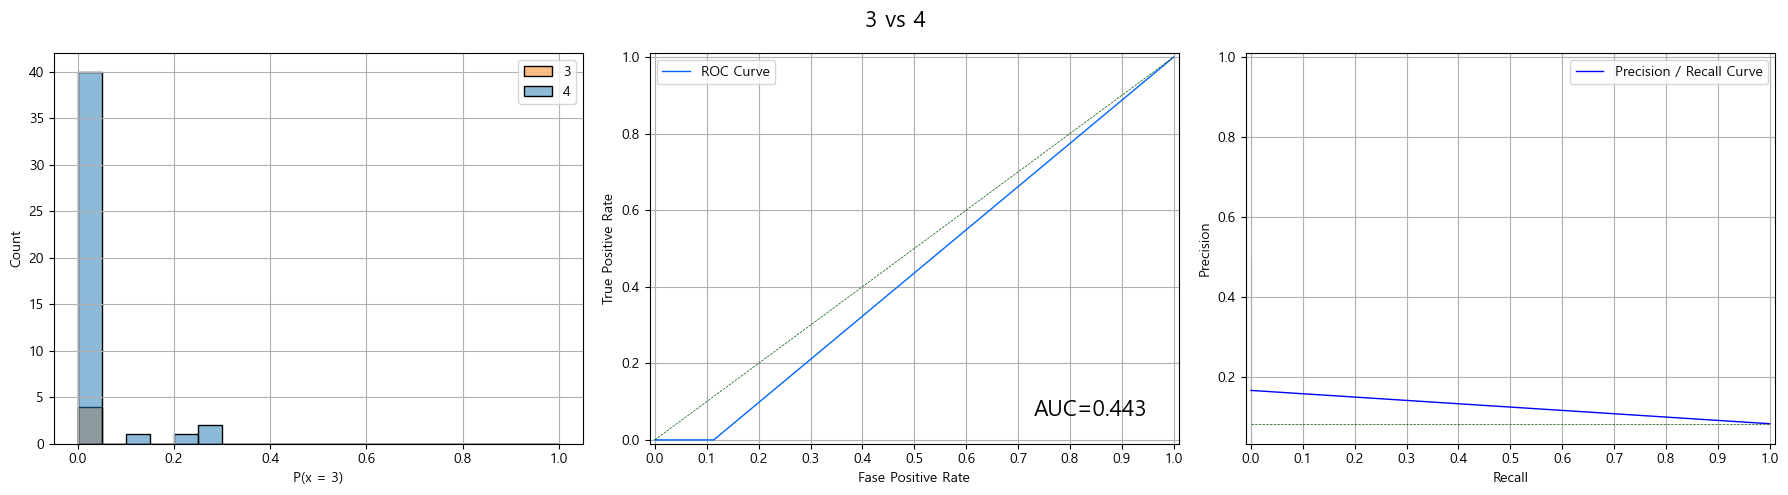

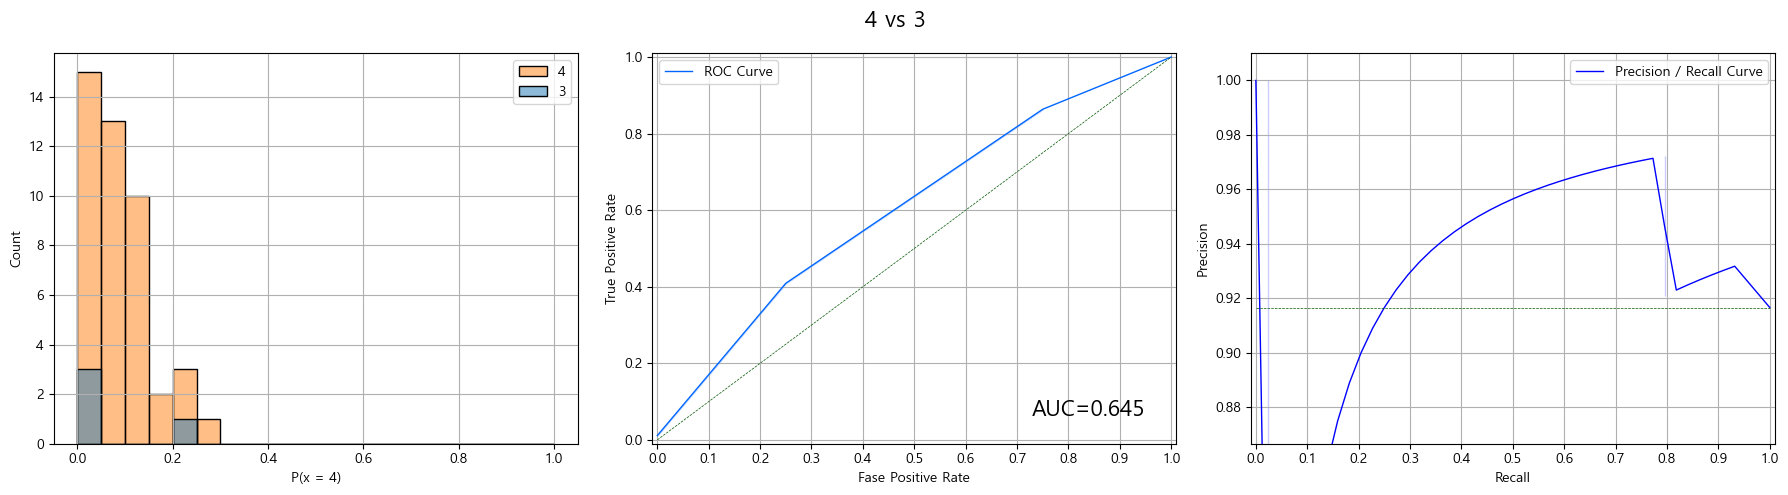

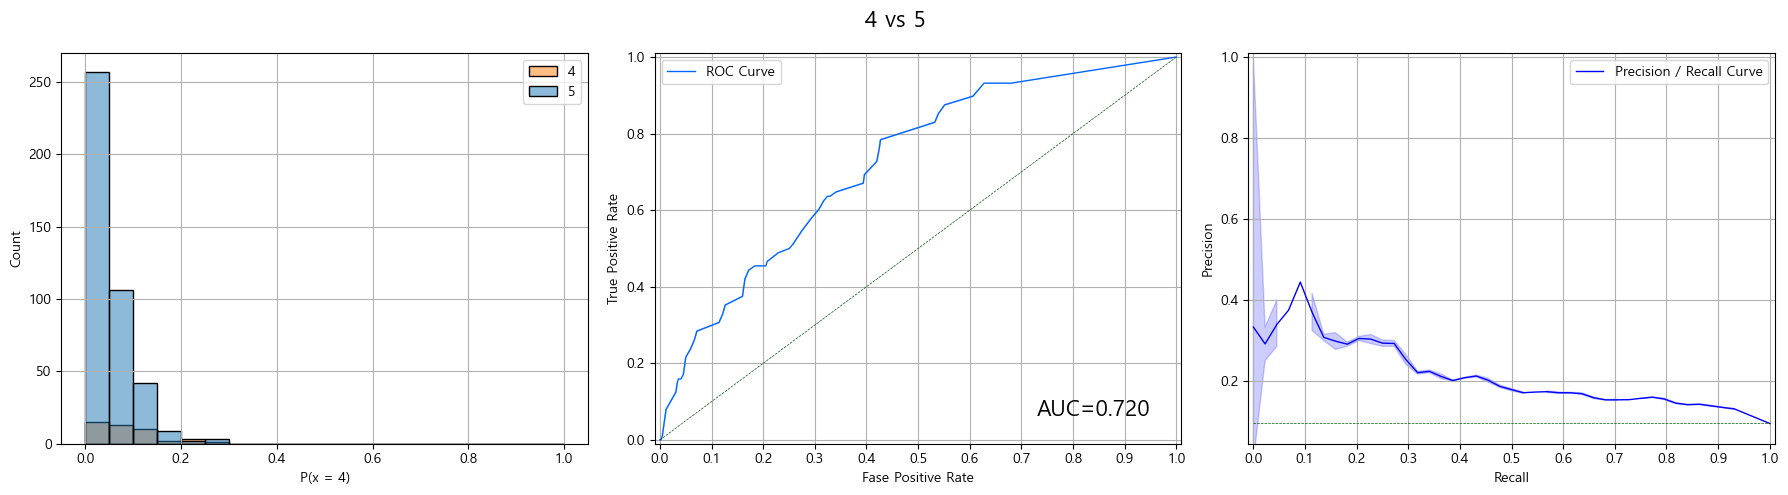

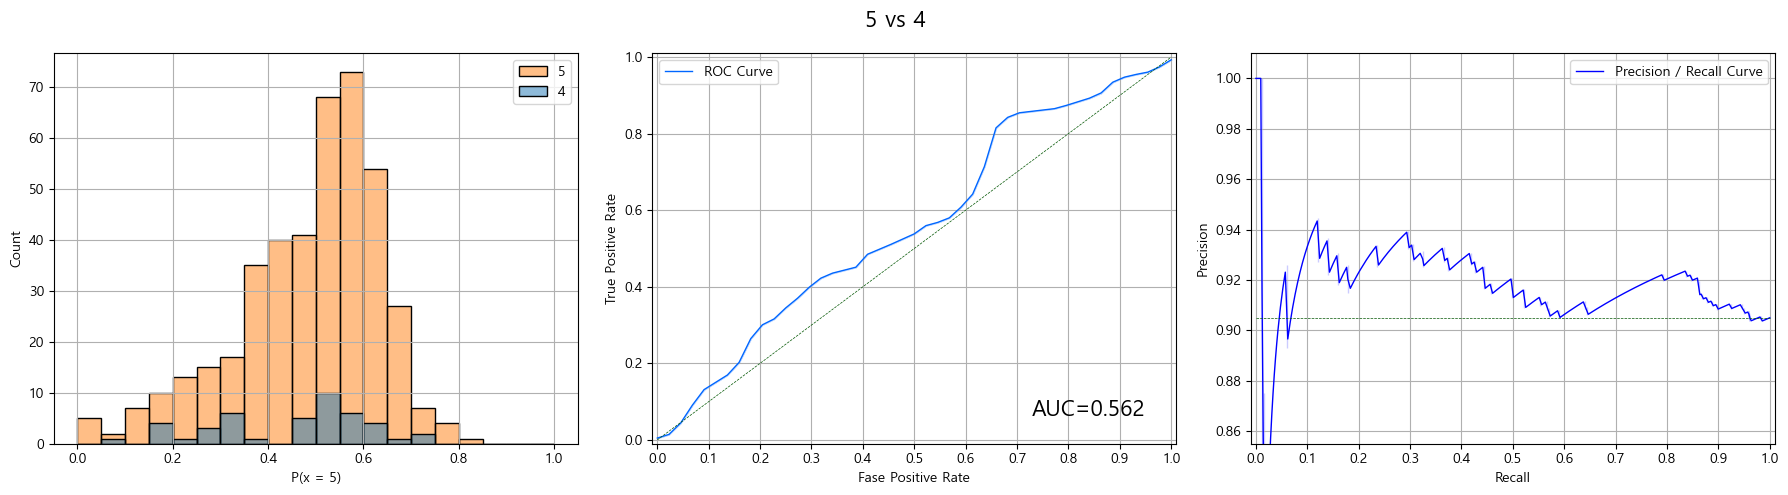

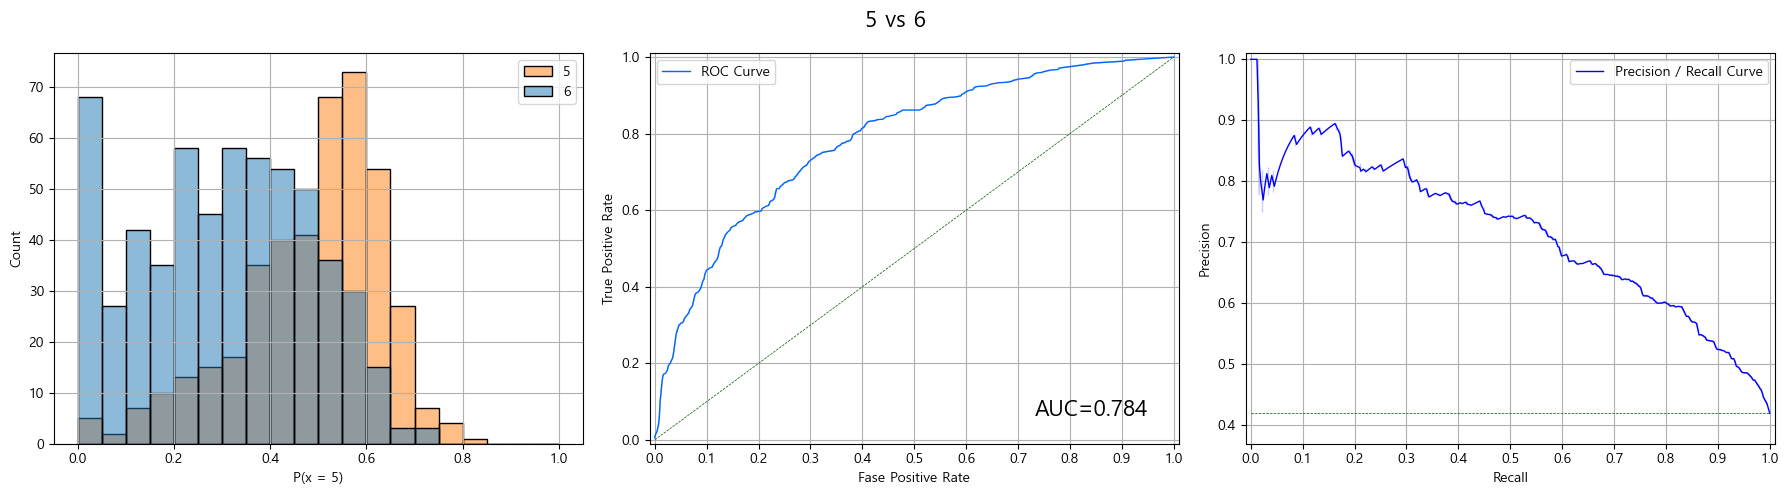

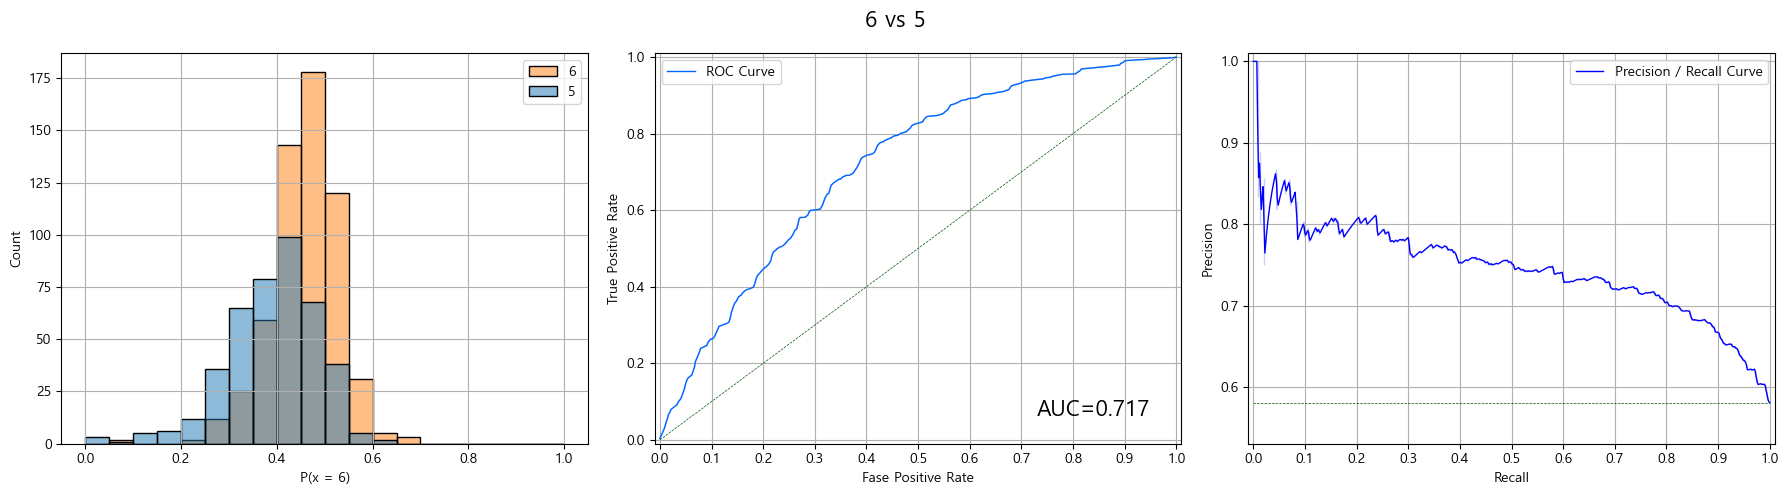

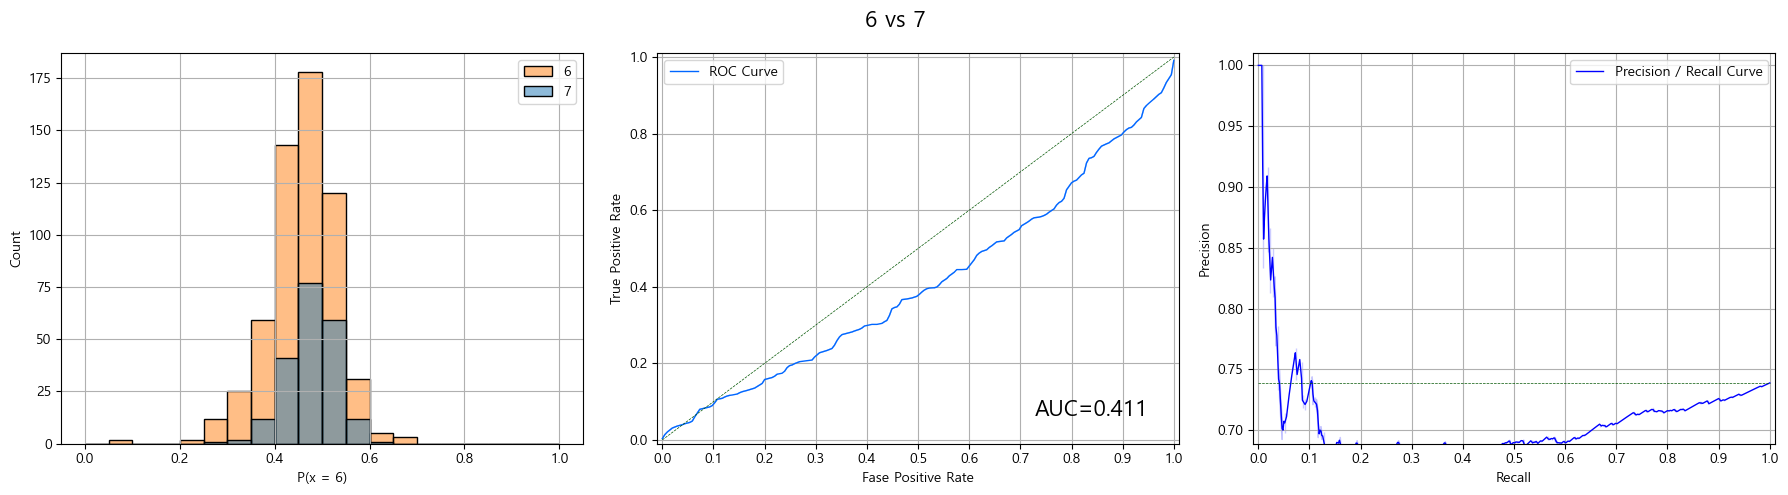

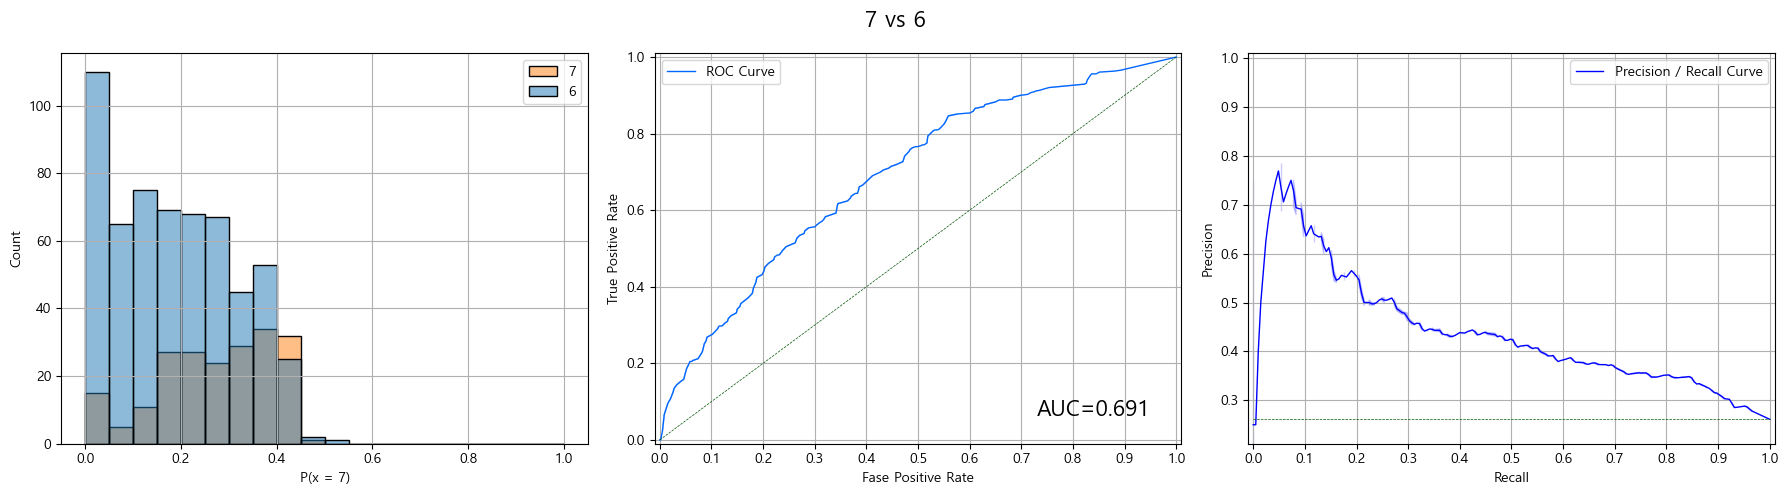

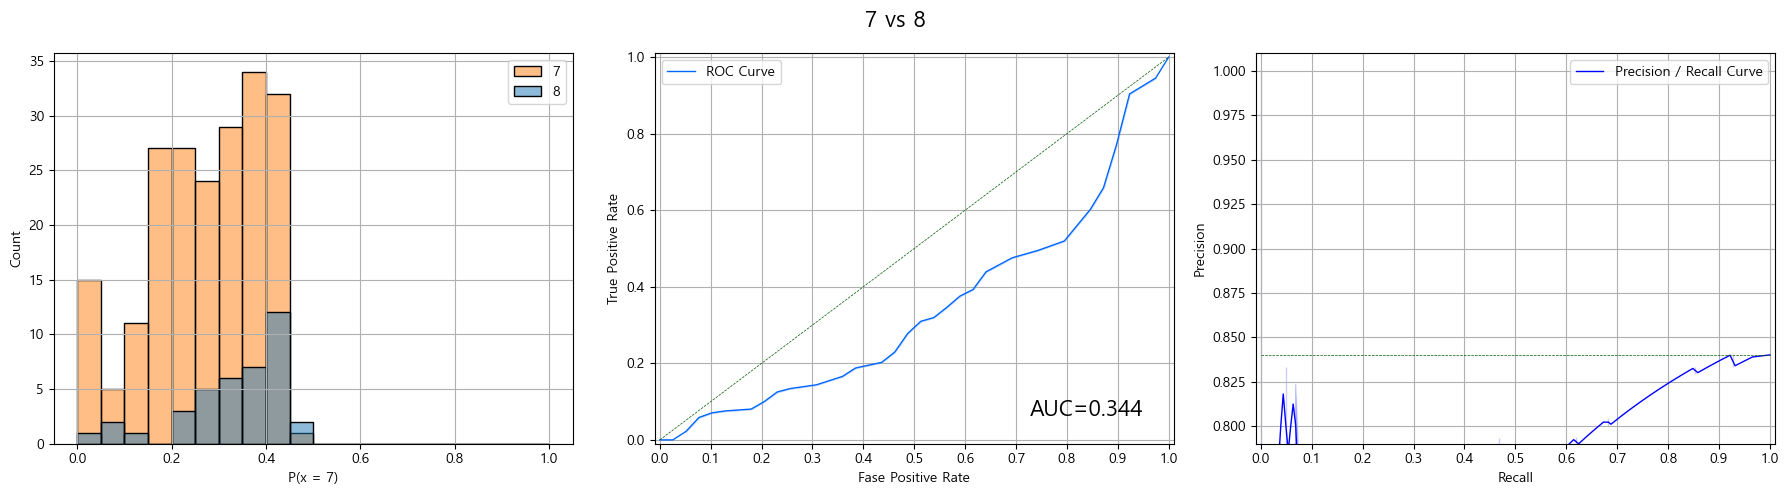

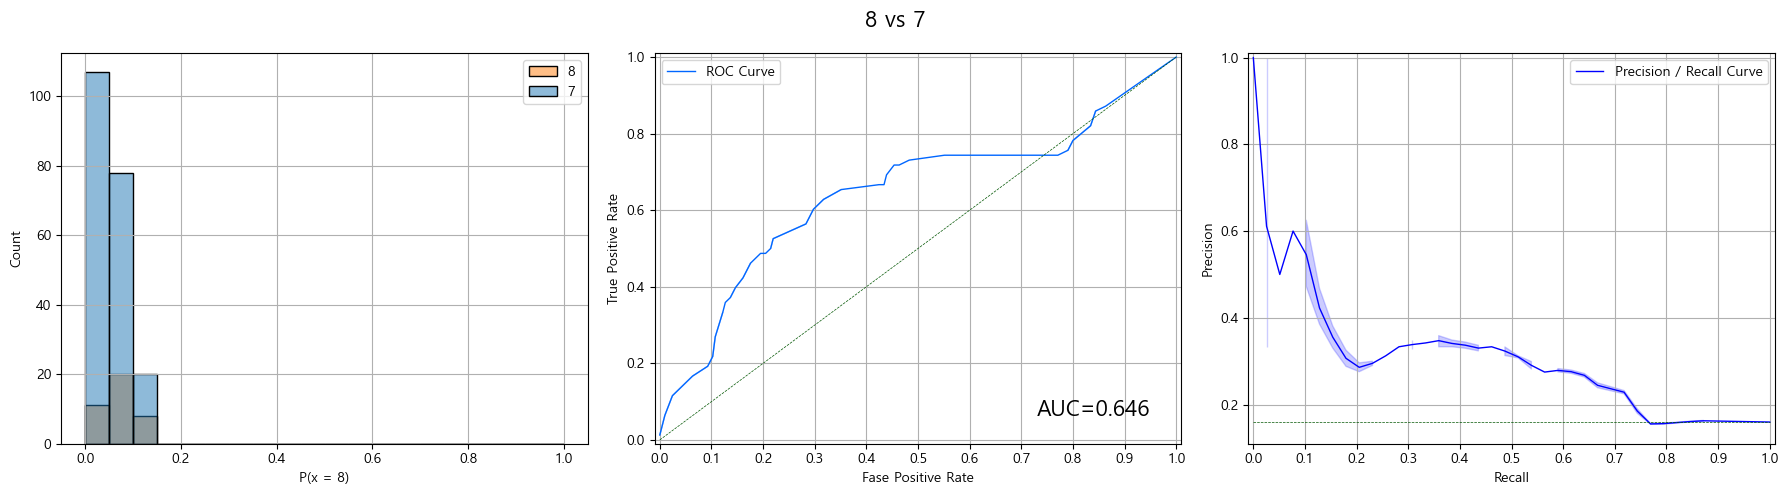

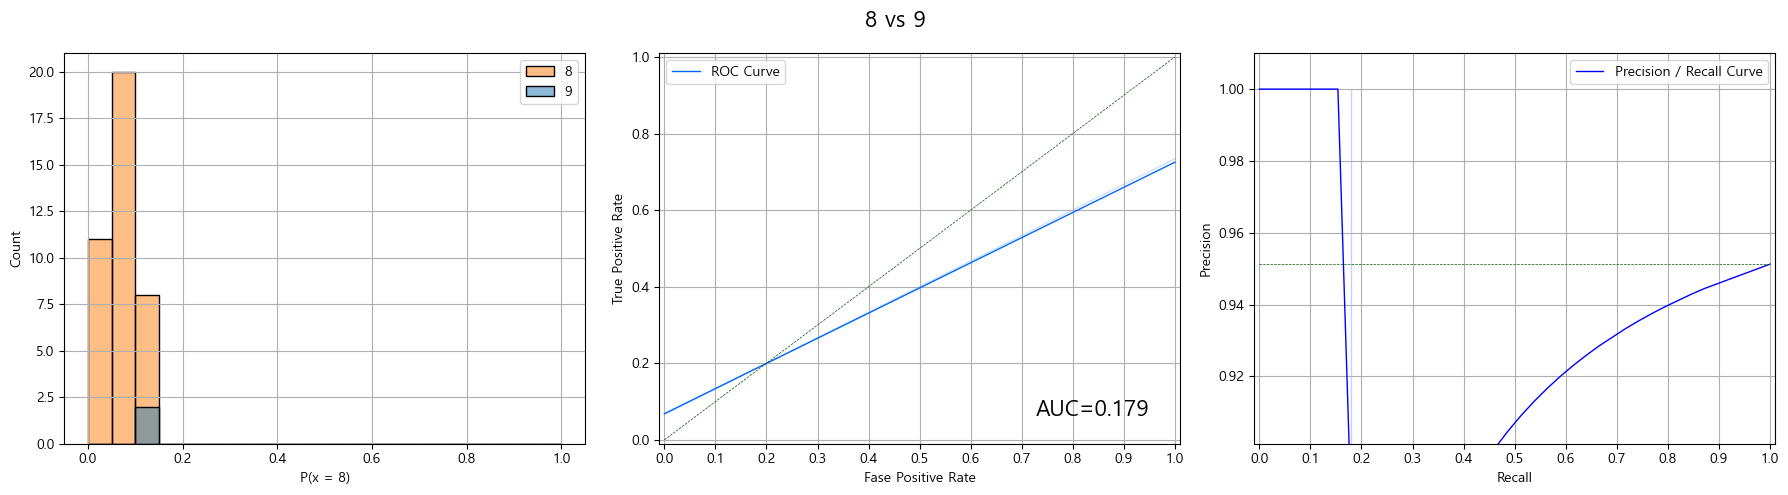

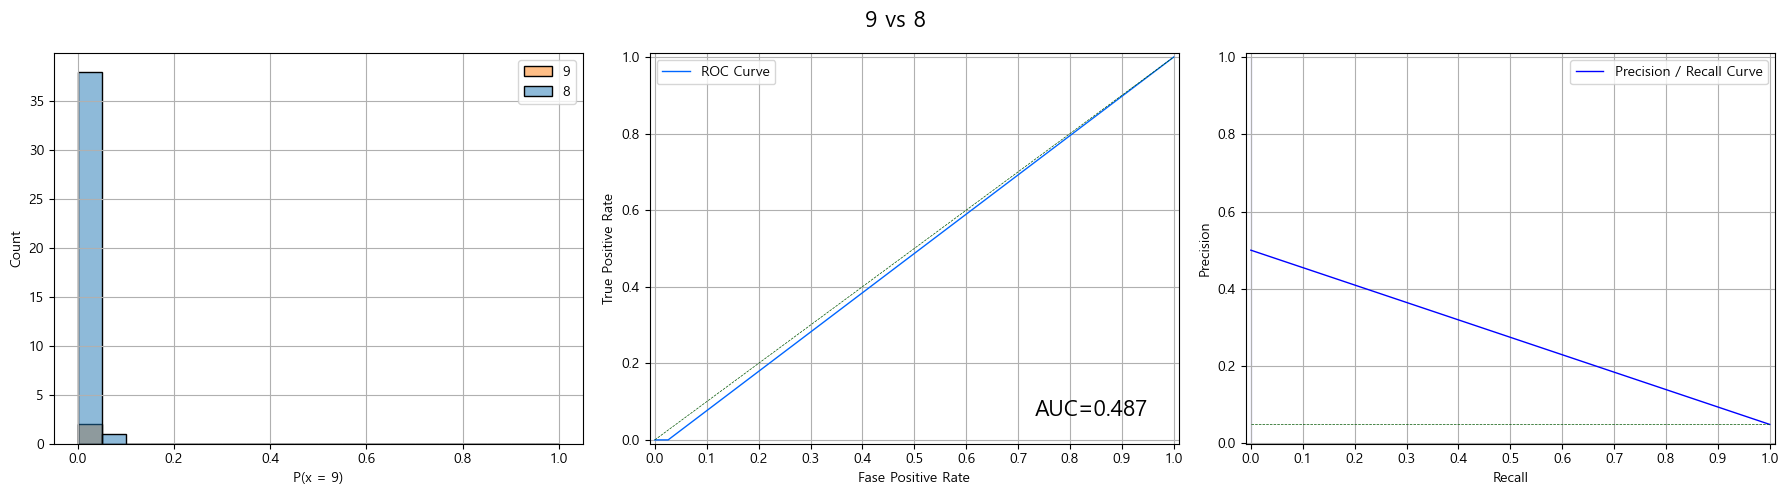

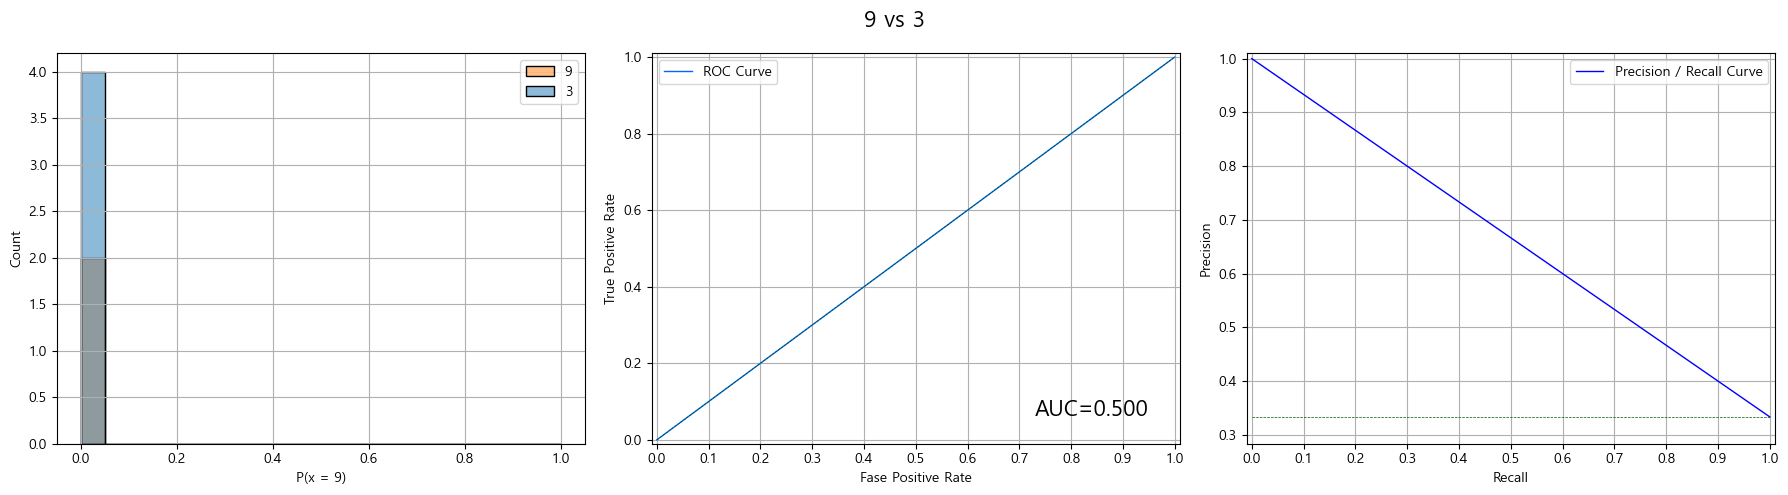

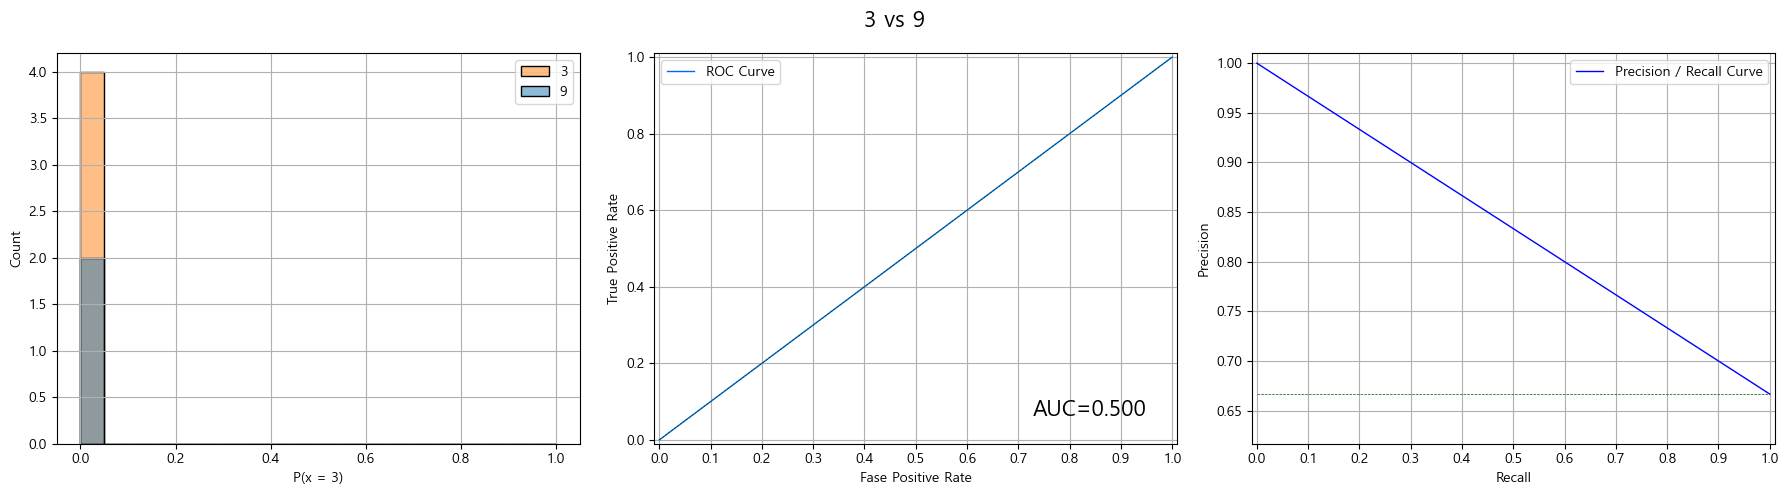

mean roc auc ovo: 0.5449


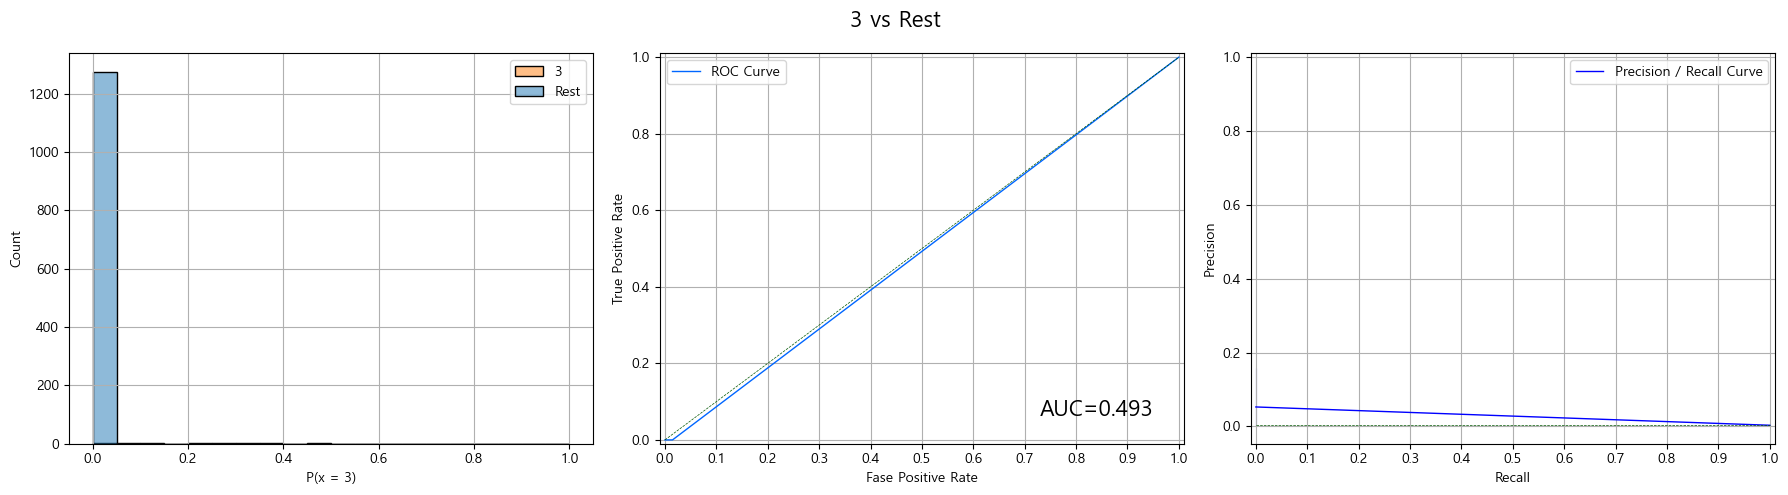

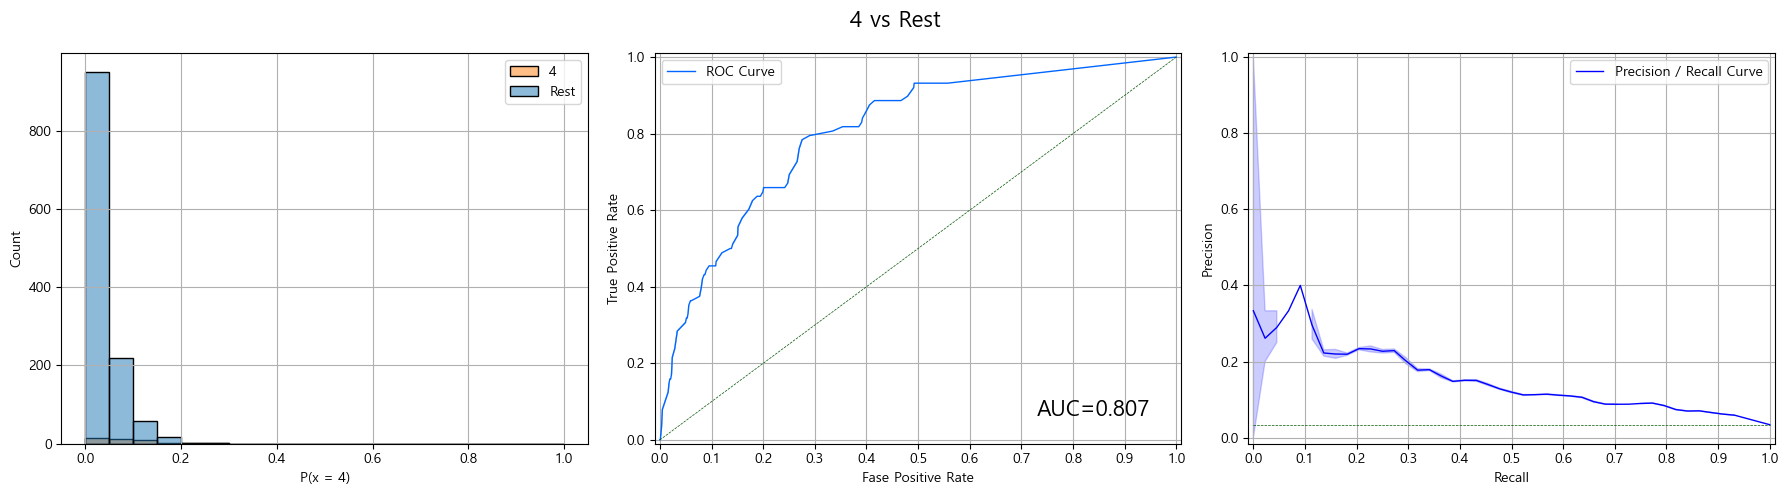

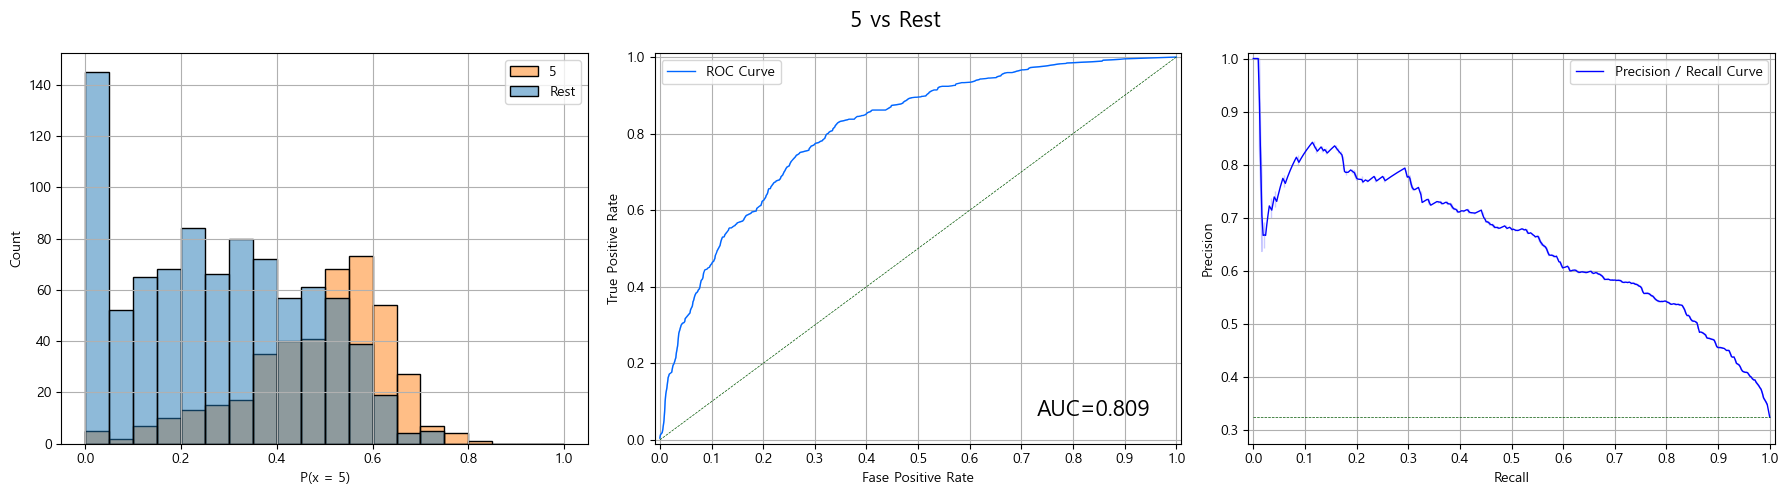

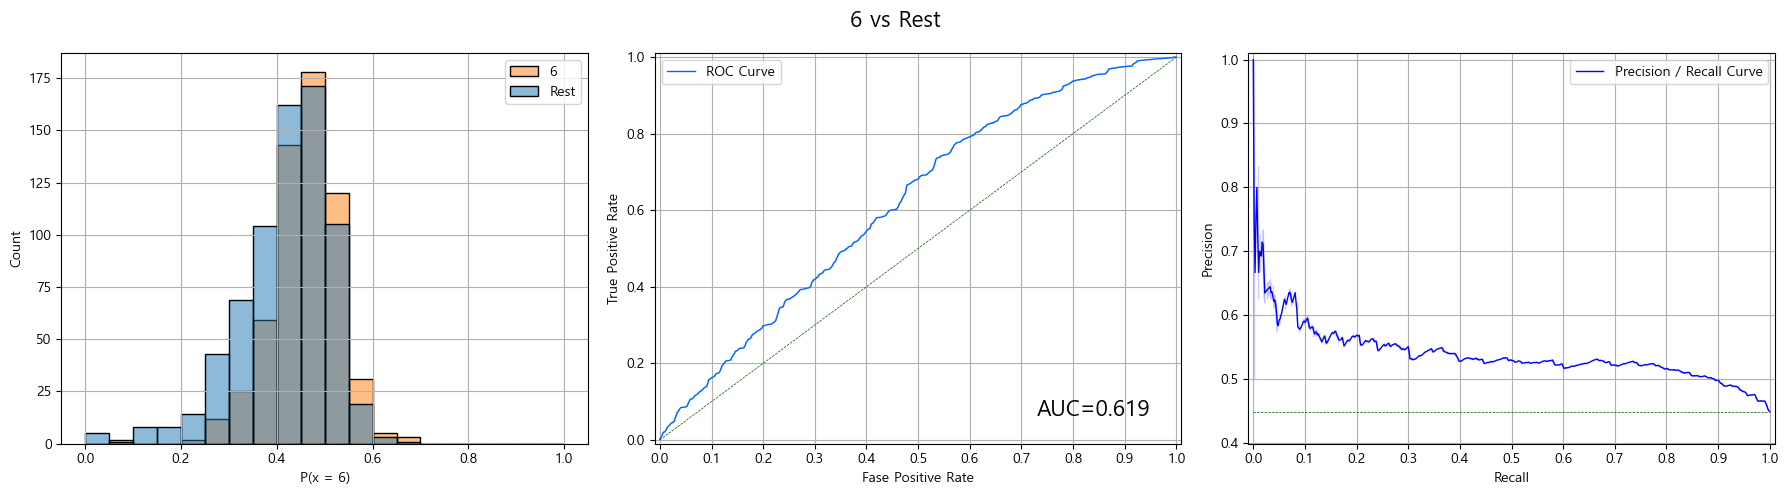

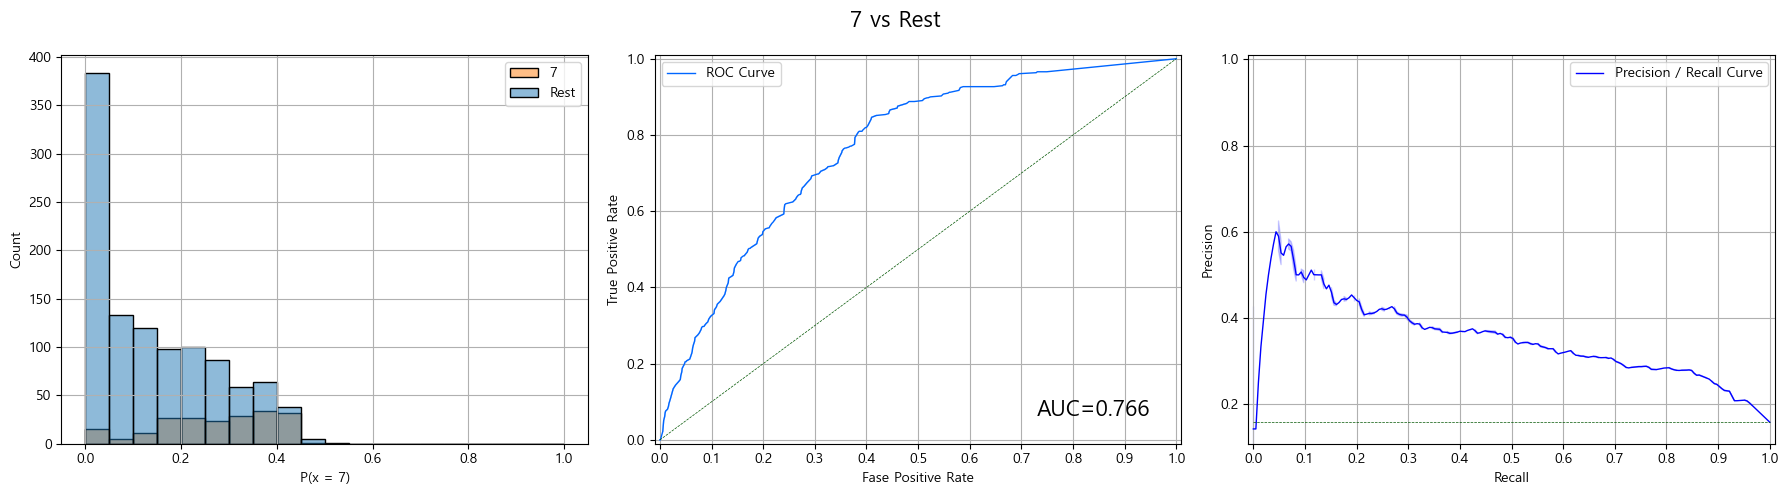

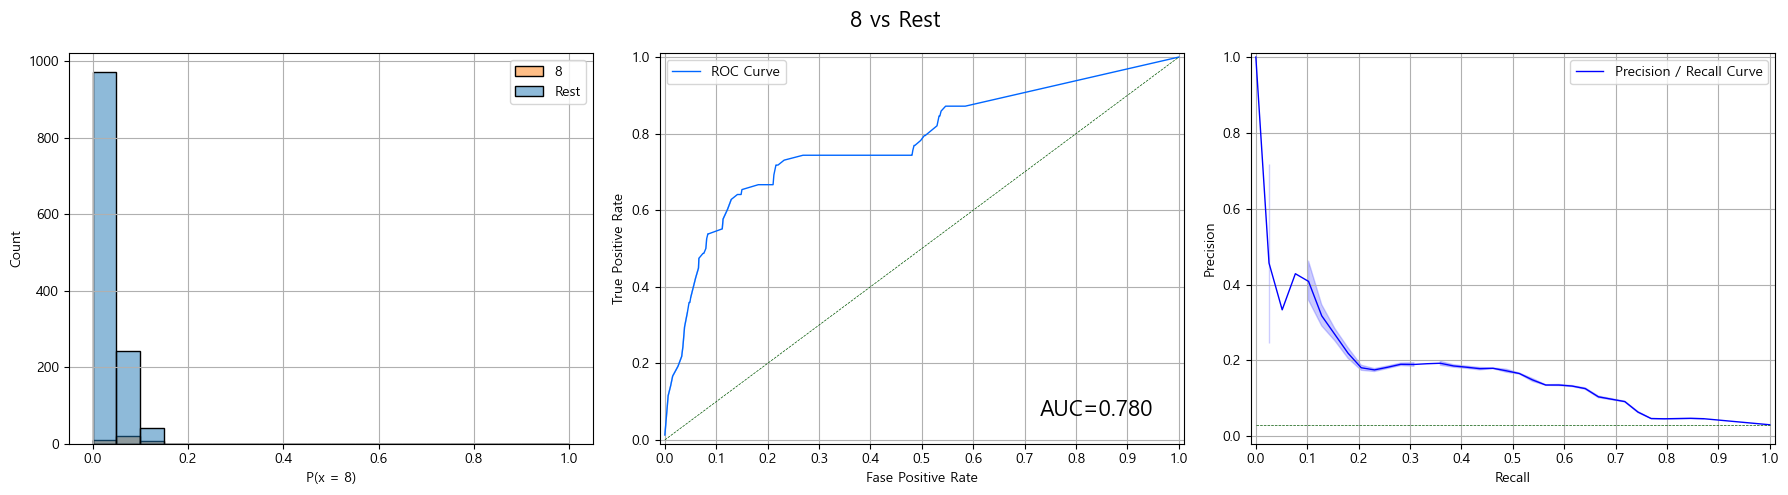

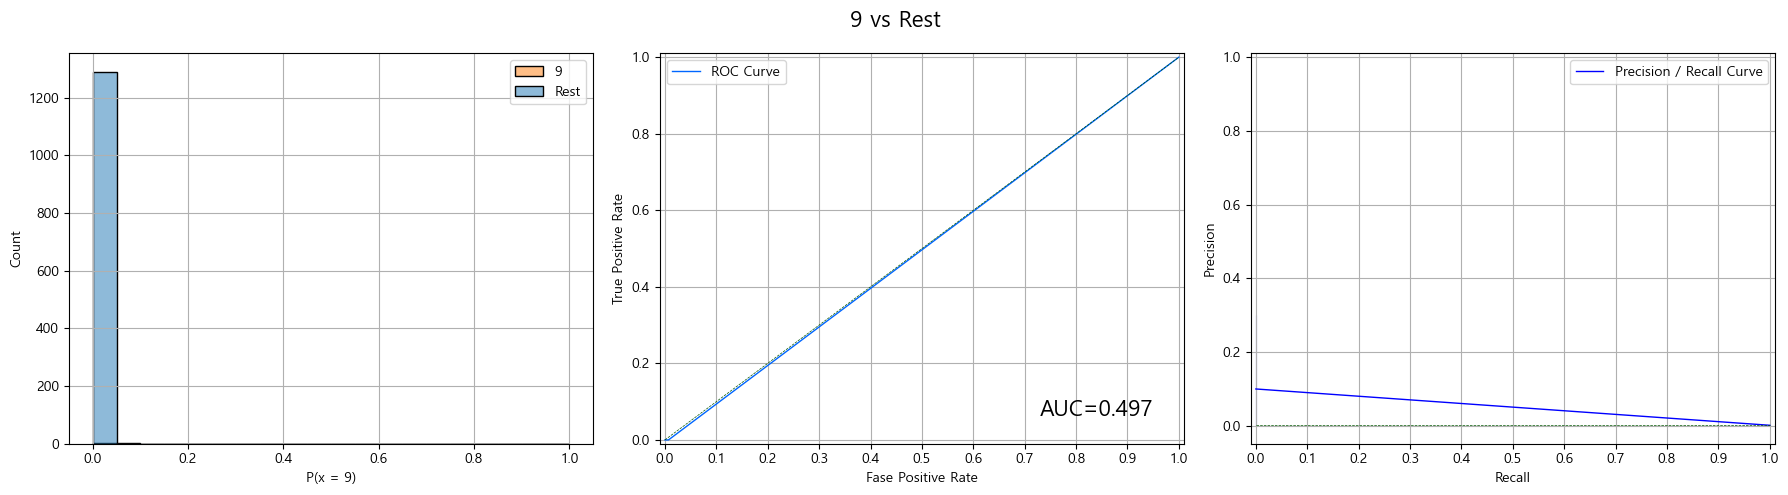

mean roc auc ovo: 0.6814

[학습곡선]


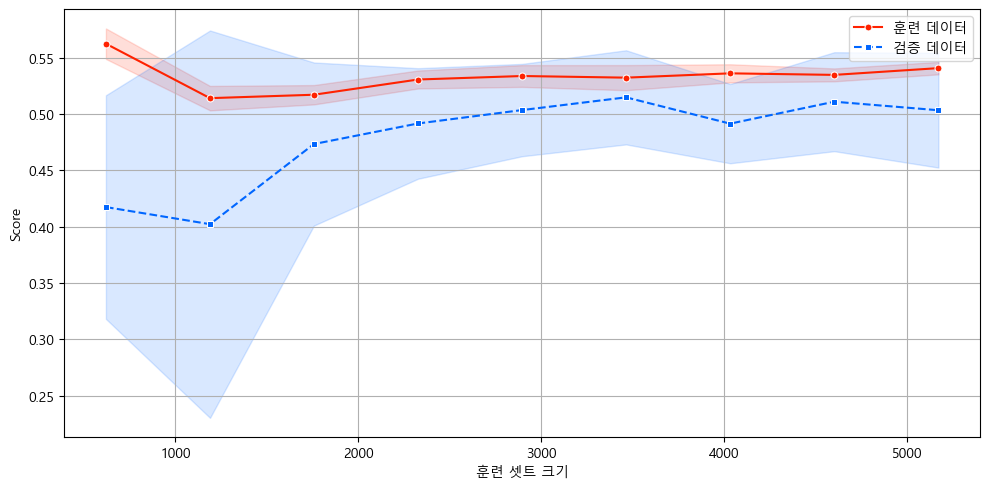

SGDClassifier(alpha=0.001, early_stopping=True, eta0=0.1,
              learning_rate='adaptive', loss='modified_huber', max_iter=4000,
              n_jobs=-1, penalty='elasticnet', random_state=1234)

In [8]:
# sgd모델 생성

my_sgd_classification(x_train, y_train, x_test, y_test)

In [9]:
# 전체 모형 
my_classification(x_train, y_train, x_test, y_test)

<LogisticRegression>(은)는 early_stopping를 허용하지 않음
LogisticRegression: {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
<KNeighborsClassifier>(은)는 random_state를 허용하지 않음
<KNeighborsClassifier>(은)는 early_stopping를 허용하지 않음
KNeighborsClassifier: {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
<SVC>(은)는 early_stopping를 허용하지 않음
SVC: {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
<GaussianNB>(은)는 n_jobs를 허용하지 않음
<GaussianNB>(은)는 random_state를 허용하지 않음
<GaussianNB>(은)는 early_stopping를 허용하지 않음
GaussianNB: {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
<DecisionTreeClassifier>(은)는 n_jobs를 허용하지 않음
<DecisionTreeClassifier>(은)는 early_stopping를 허용하지 않음
SGDClassifier: {'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'co

{'GaussianNB': GaussianNB(var_smoothing=1e-05),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7,
                      weights='distance'),
 'LogisticRegression': LogisticRegression(C=1, max_iter=1000, n_jobs=1, random_state=1234),
 'SVC': SVC(C=10, degree=2, n_jobs=-1, random_state=1234),
 'SGDClassifier': SGDClassifier(alpha=0.001, early_stopping=True, eta0=0.1,
               learning_rate='adaptive', loss='modified_huber', n_jobs=-1,
               penalty='elasticnet', random_state=1234),
 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.00017854485939592315, random_state=1234)}

In [10]:
y_train.value_counts()

quality
6    2240
5    1709
7     869
4     170
8     153
3      26
9       3
Name: count, dtype: int64

In [11]:
# 종속변수의 데이터 분포 불균형 해소
undersampler = RandomUnderSampler(sampling_strategy = 'majority', random_state=777)
x_under, y_under = undersampler.fit_resample(x_train, y_train)
y_under.value_counts()

quality
5    1709
7     869
4     170
8     153
3      26
6       3
9       3
Name: count, dtype: int64

In [12]:
# 종속변수의 데이터 분포 불균형 해소
oversampler = RandomOverSampler(sampling_strategy = 'not majority', random_state=777)
x_over, y_over = oversampler.fit_resample(x_train, y_train)
y_over.value_counts()

quality
5    2240
6    2240
7    2240
4    2240
8    2240
3    2240
9    2240
Name: count, dtype: int64

In [13]:
# 종속변수의 데이터 분포 불균형 해소
# smote_sampler = SMOTE(sampling_strategy = 'minority', k_neighbors=3, random_state=888)
# x_smote, y_smote = smote_sampler.fit_resample(x_train, y_train)
# y_smote.value_counts()

SGDClassifier: {'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
[교차검증 TOP5]
+-----+------------+------------+----------------+-----------------+--------+---------+-------------------+
|     | penalty    |   max_iter | loss           | learning_rate   |   eta0 |   alpha |   mean_test_score |
|-----+------------+------------+----------------+-----------------+--------+---------+-------------------|
| 384 | l1         |       2000 | modified_huber | adaptive        |    0.5 |  0.0001 |          0.496939 |
|  72 | l1         |       3000 | modified_huber | adaptive        |    0.5 |  0.0001 |          0.496939 |
| 382 | l1         |       4000 | modified_huber | adaptive        |    0.5 |  0.0001 |          0.496939 |
|  48 | l2         |       1000 | modified_huber | adaptive       

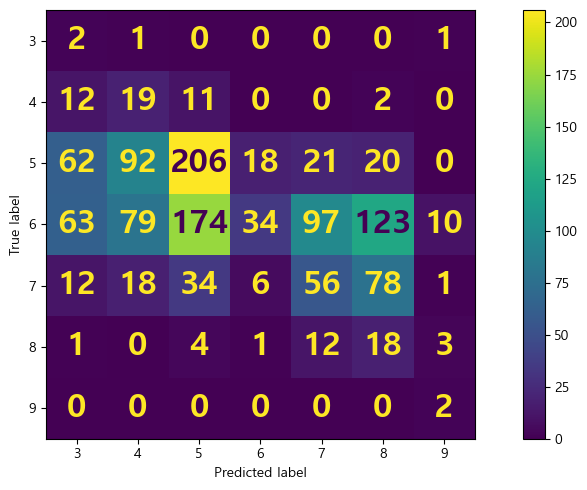


[Roc Curve]


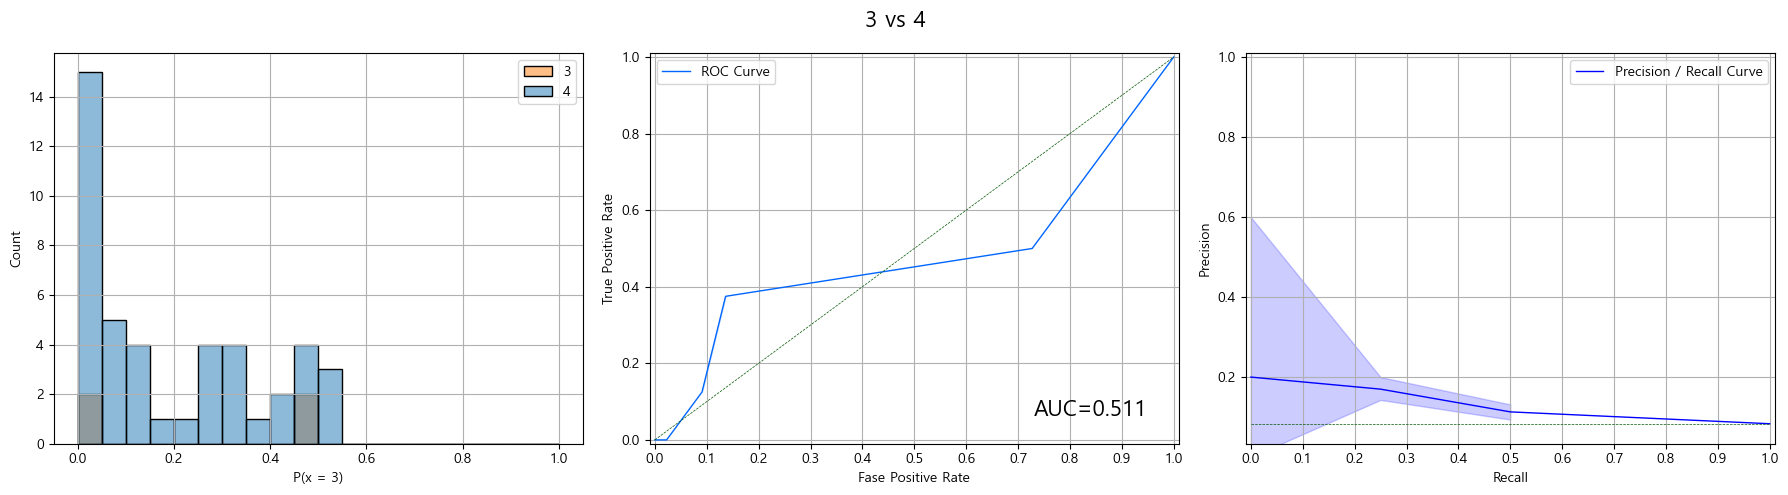

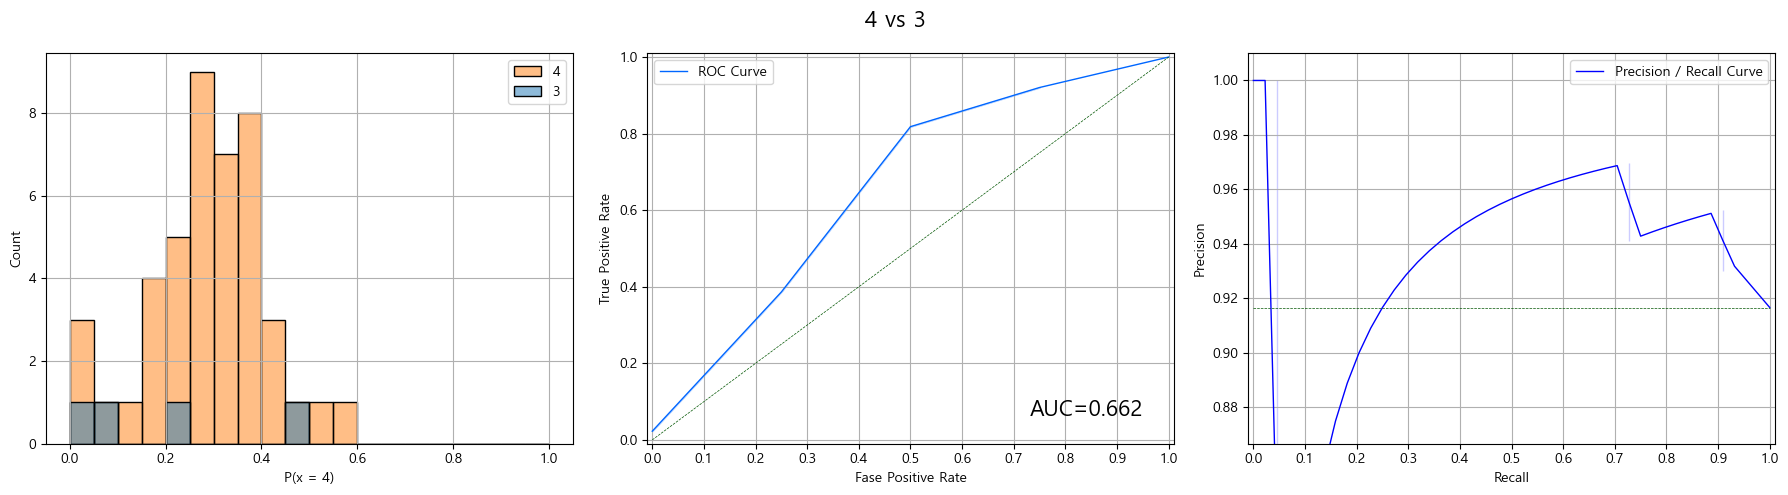

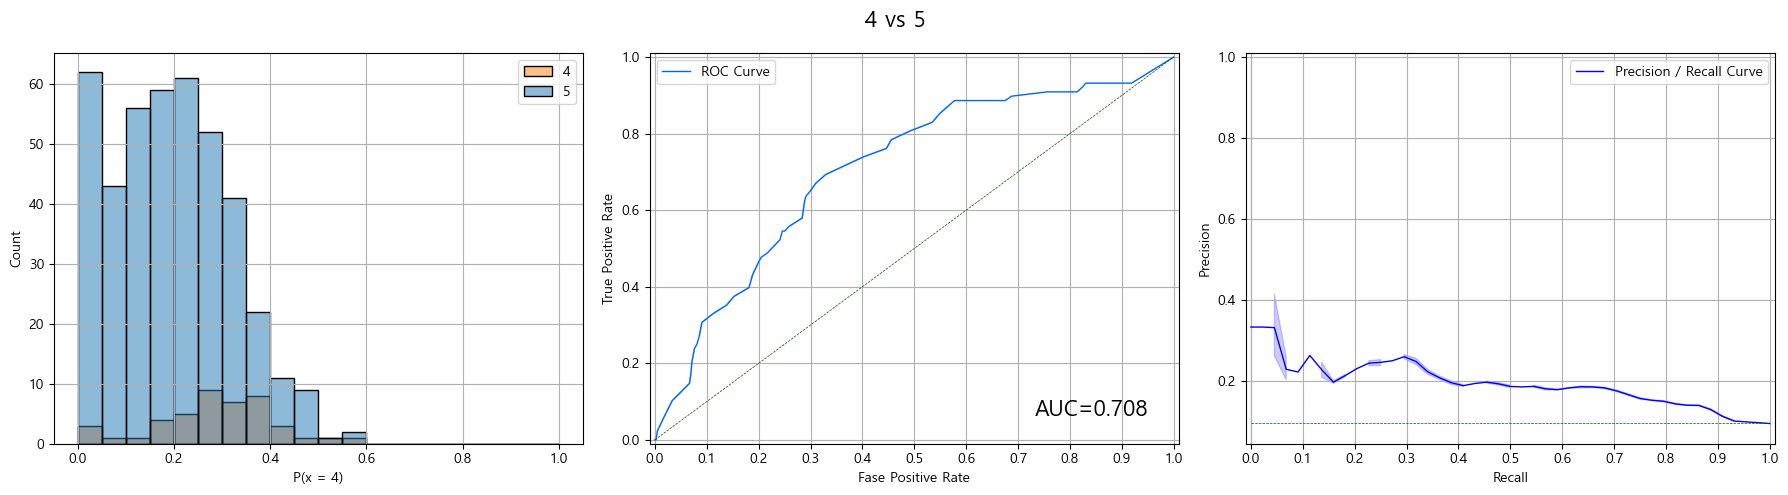

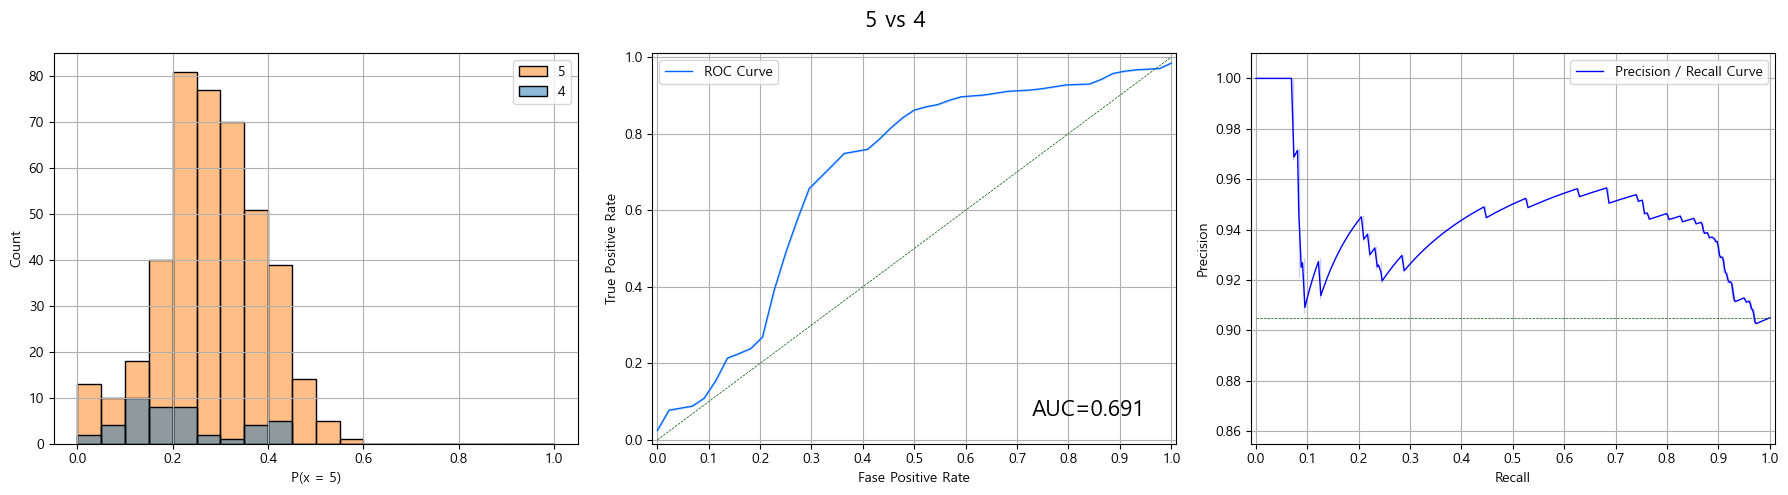

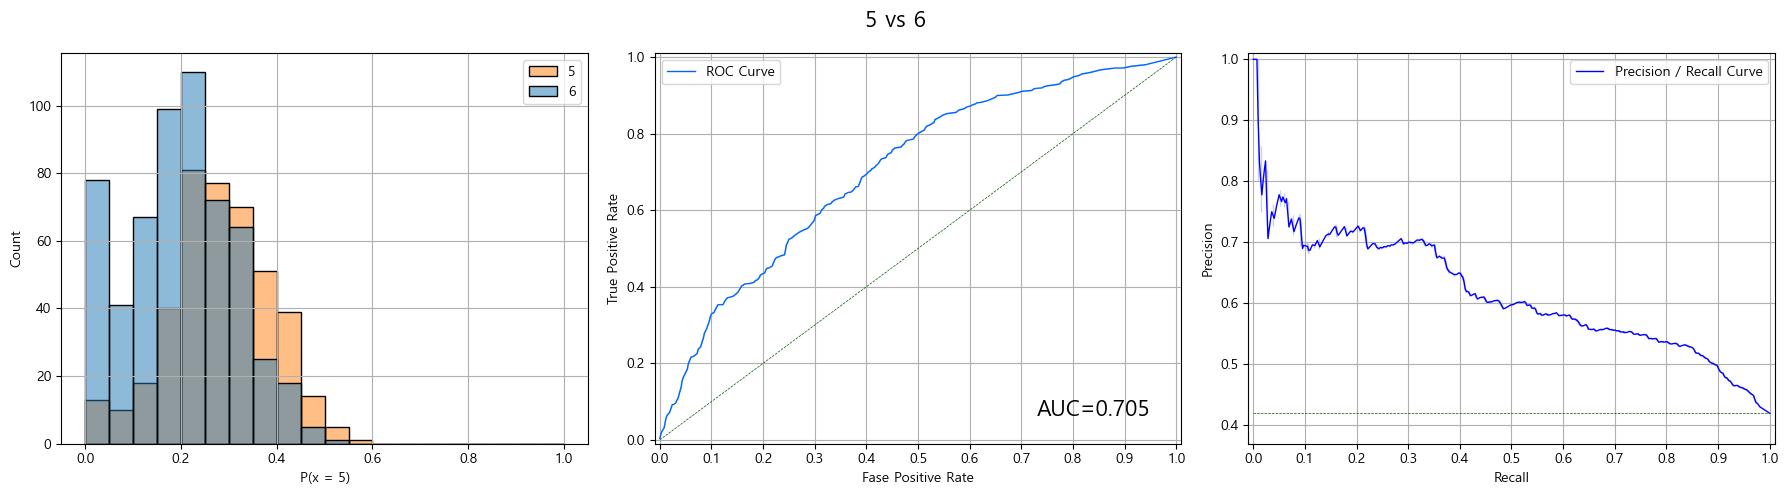

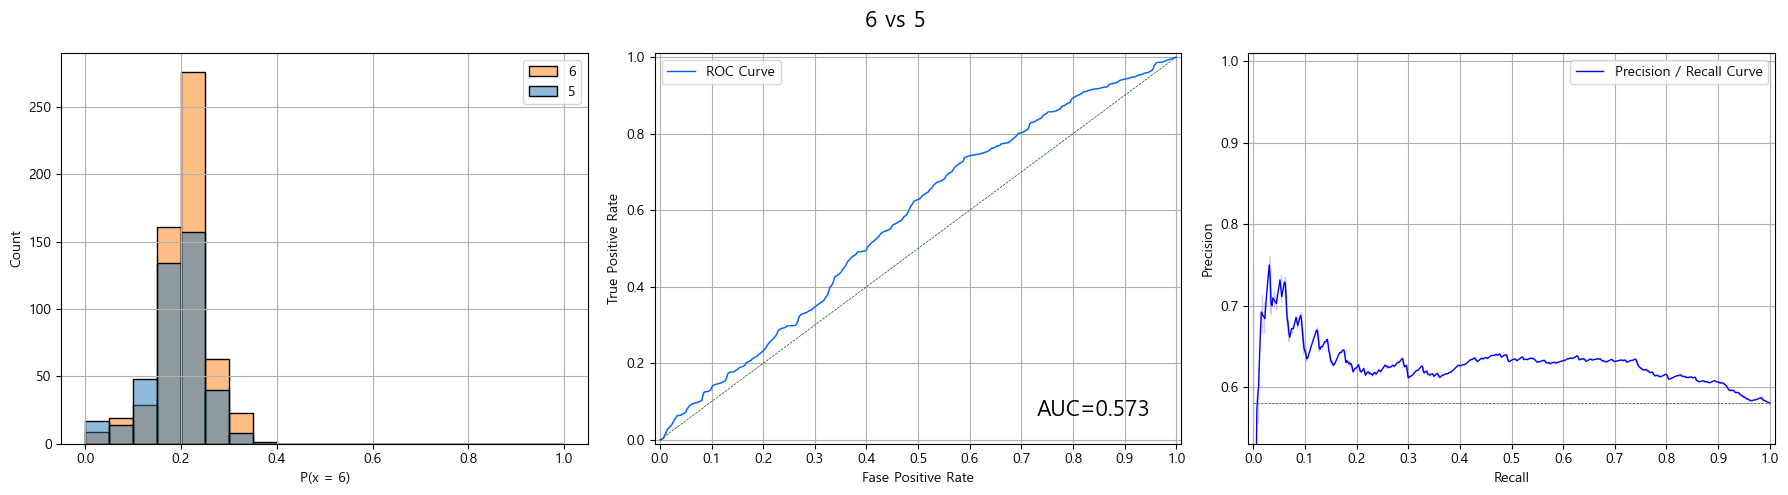

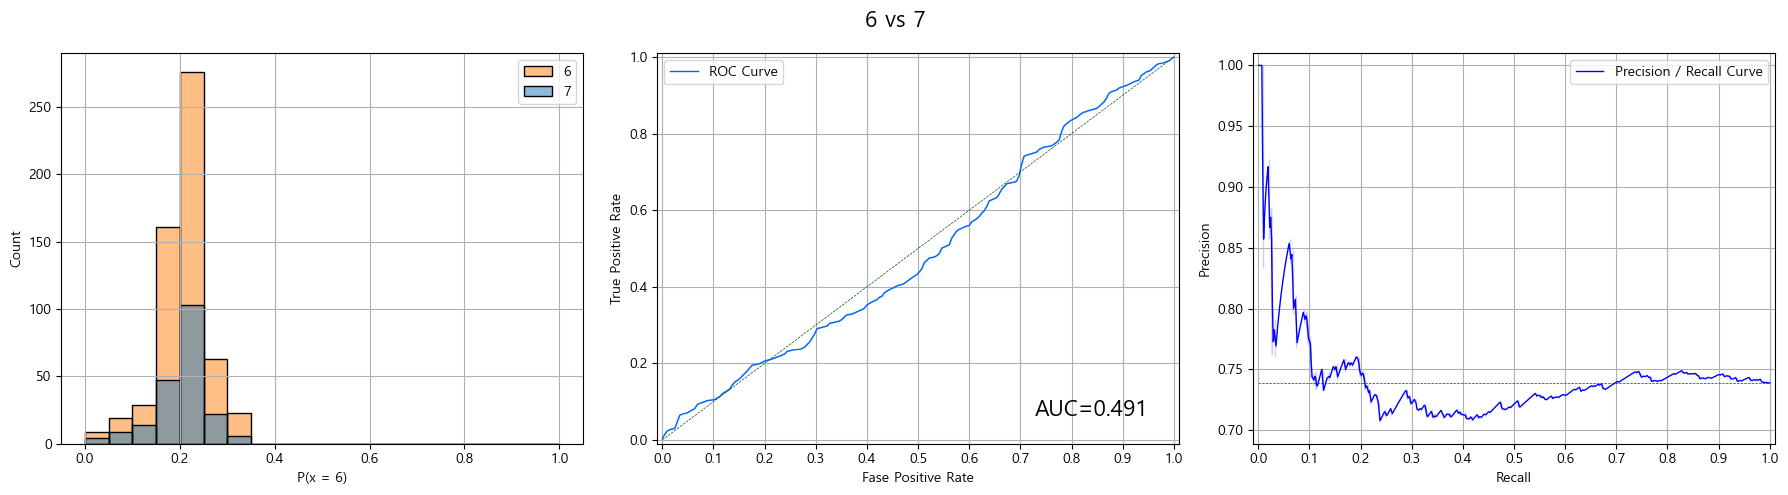

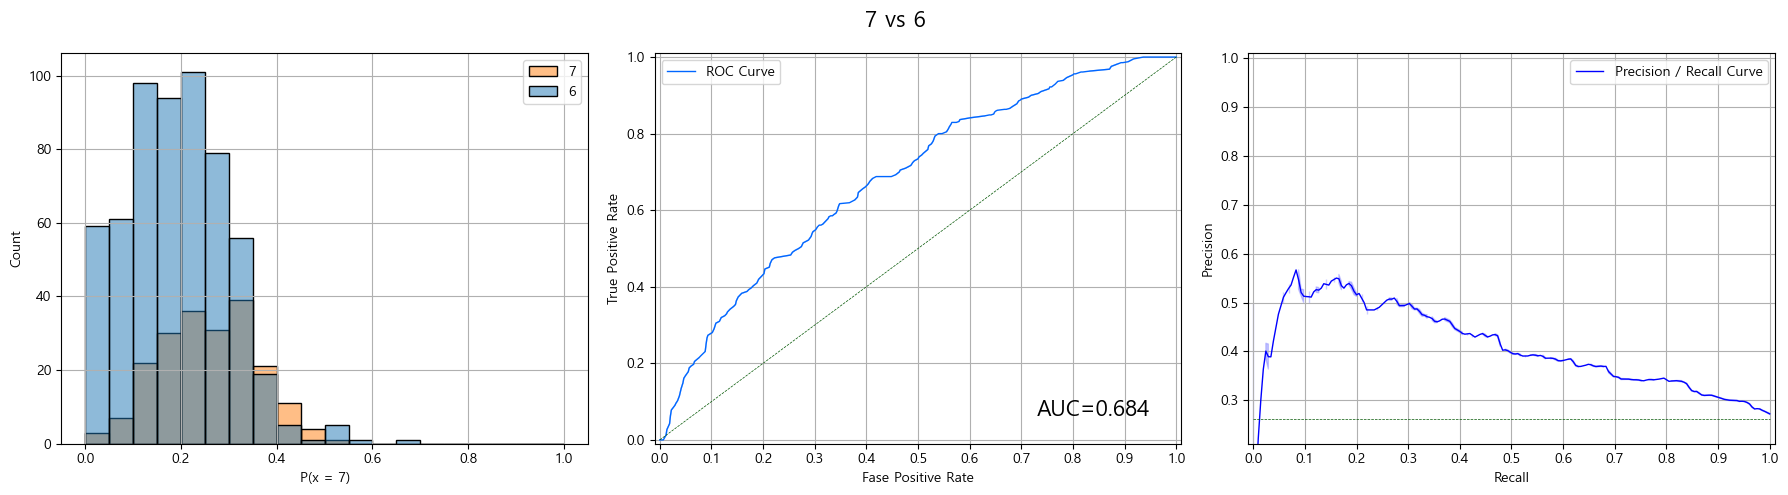

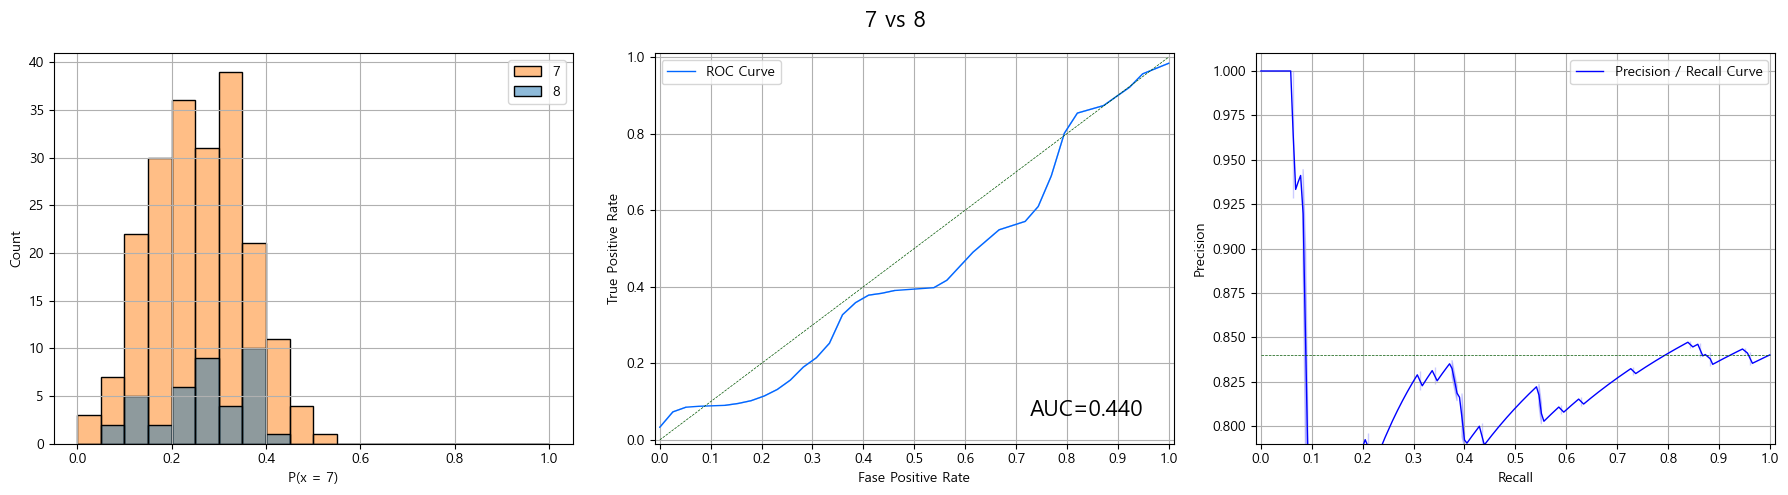

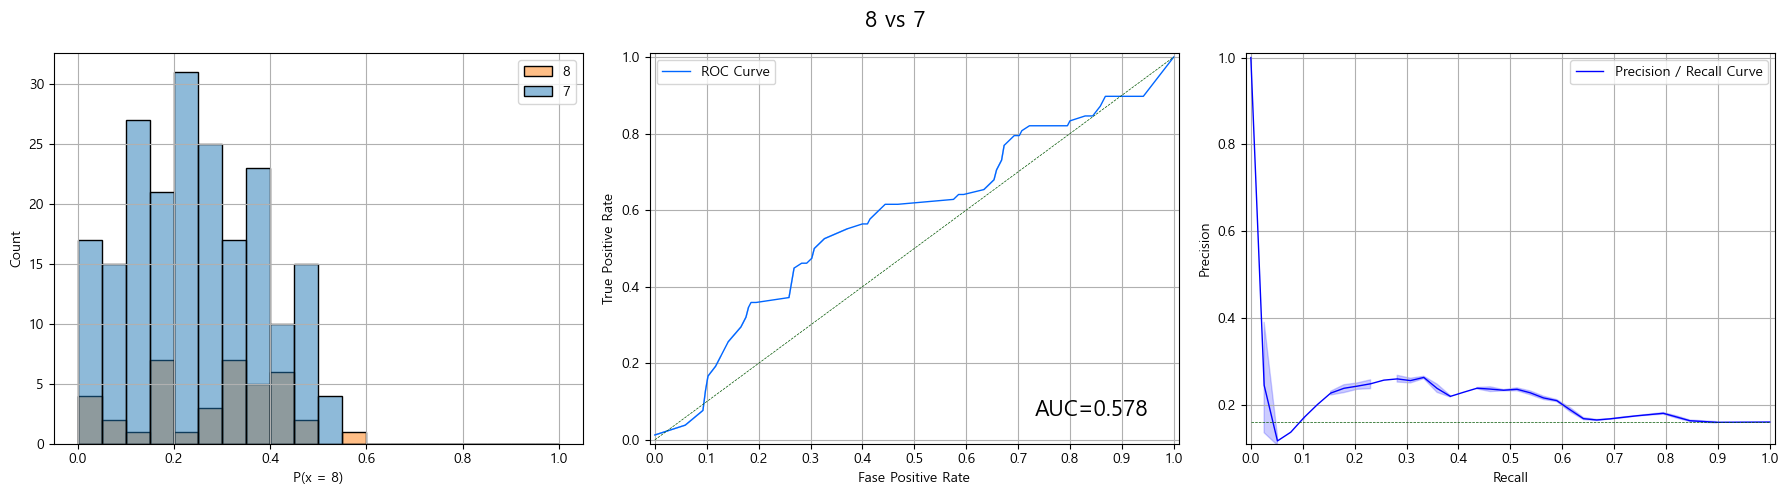

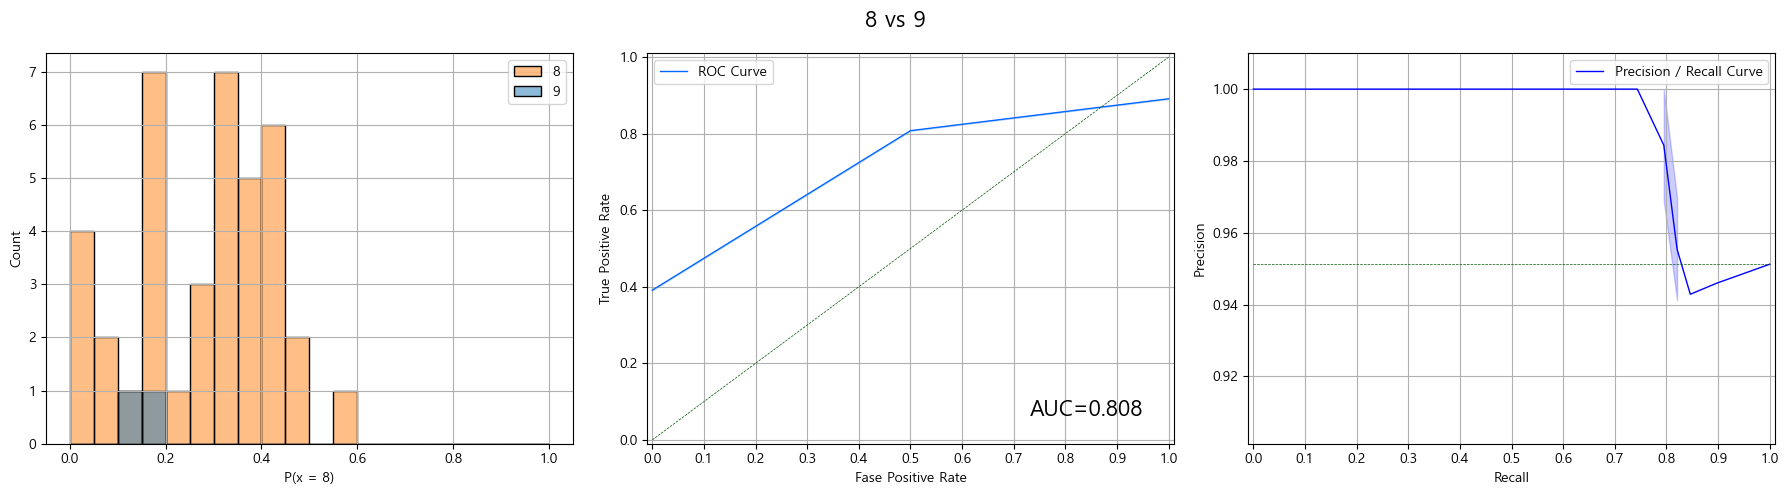

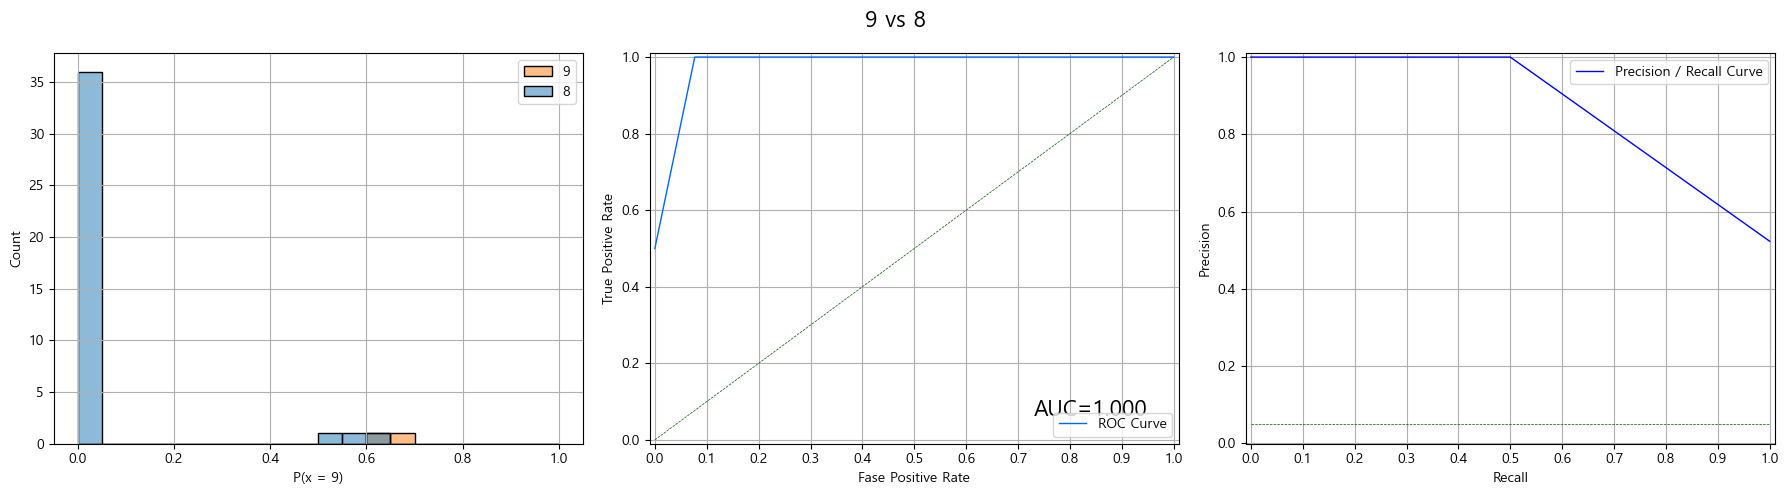

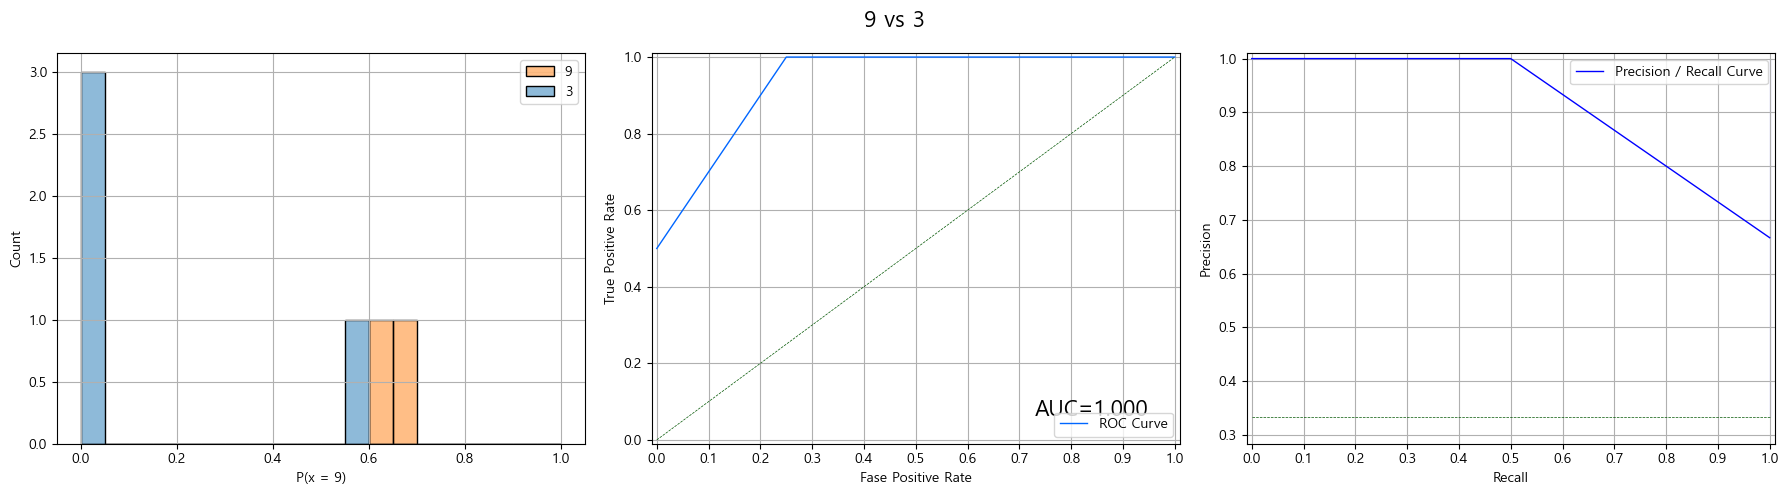

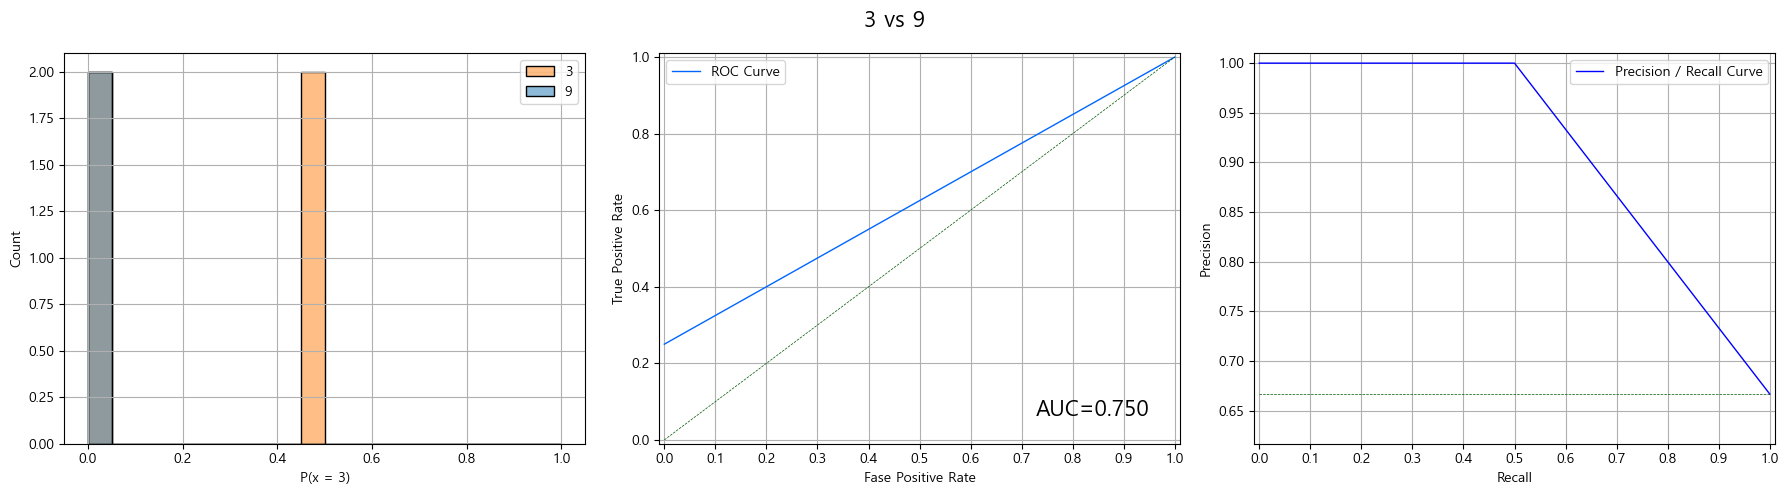

mean roc auc ovo: 0.6859


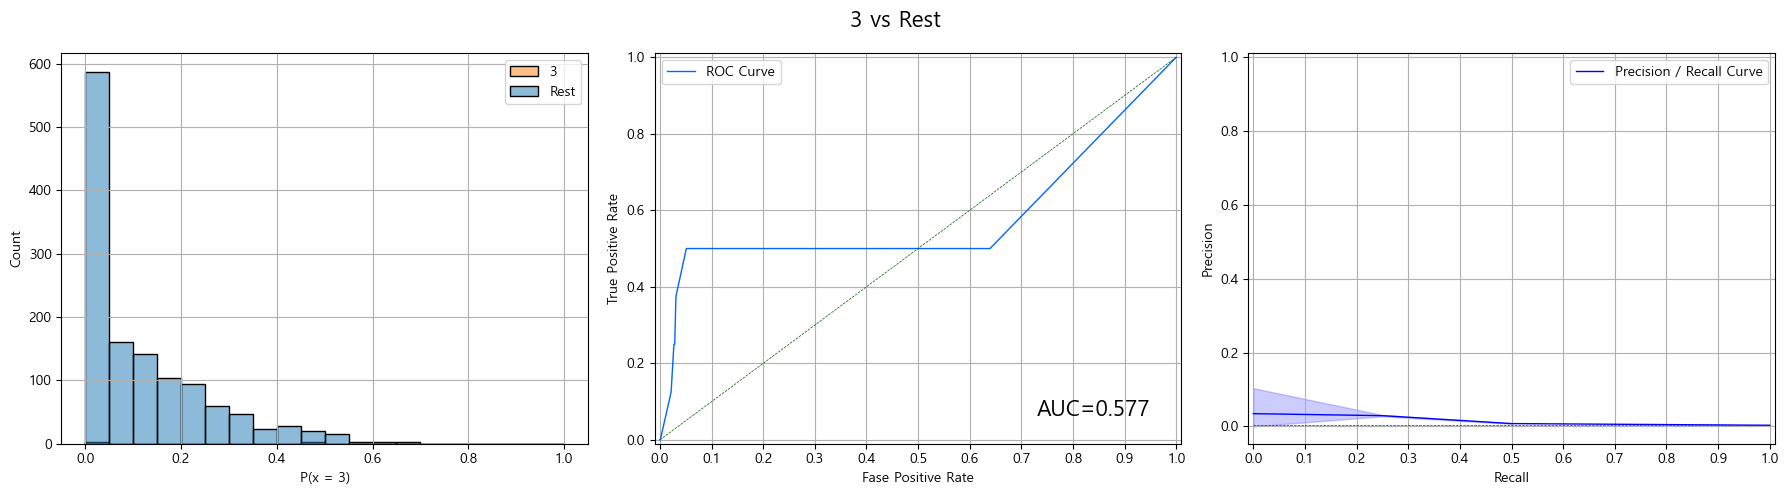

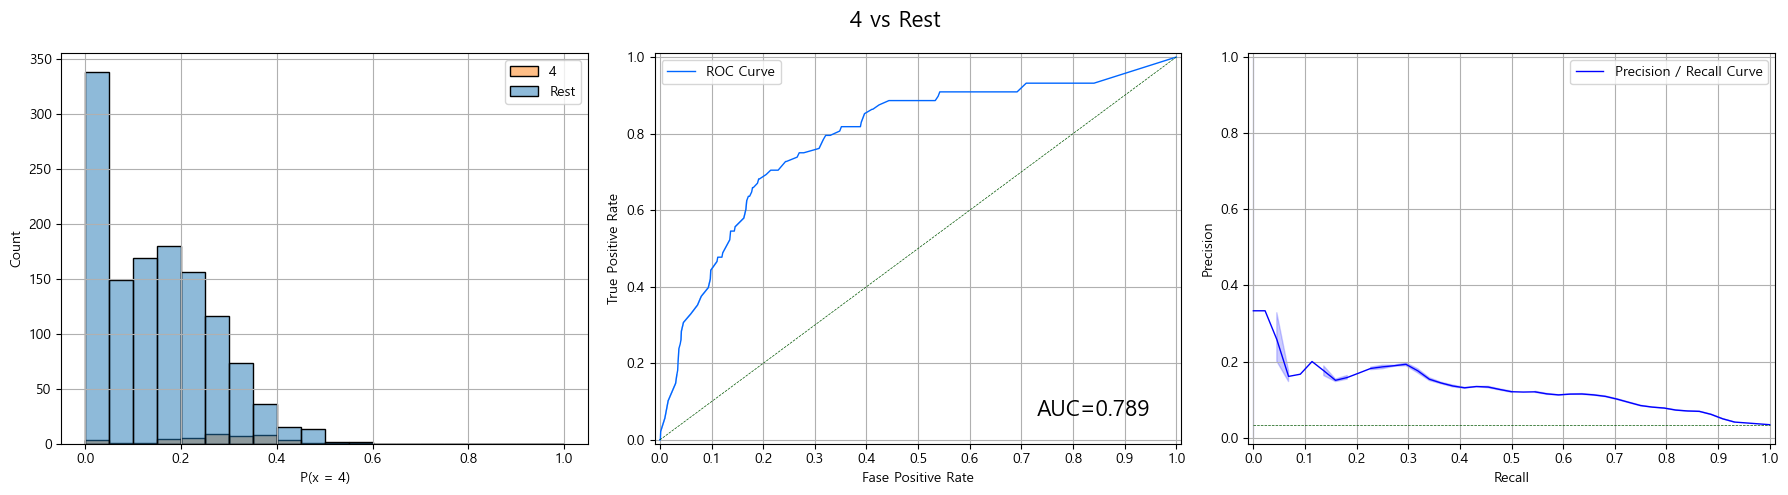

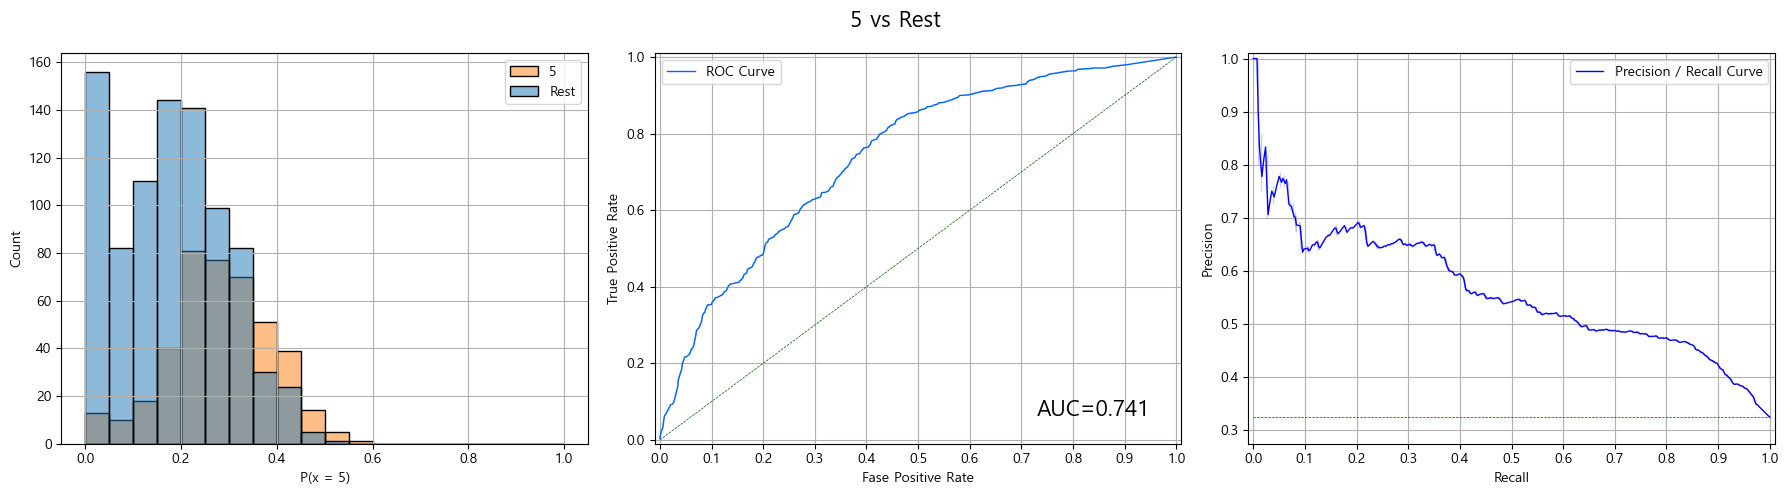

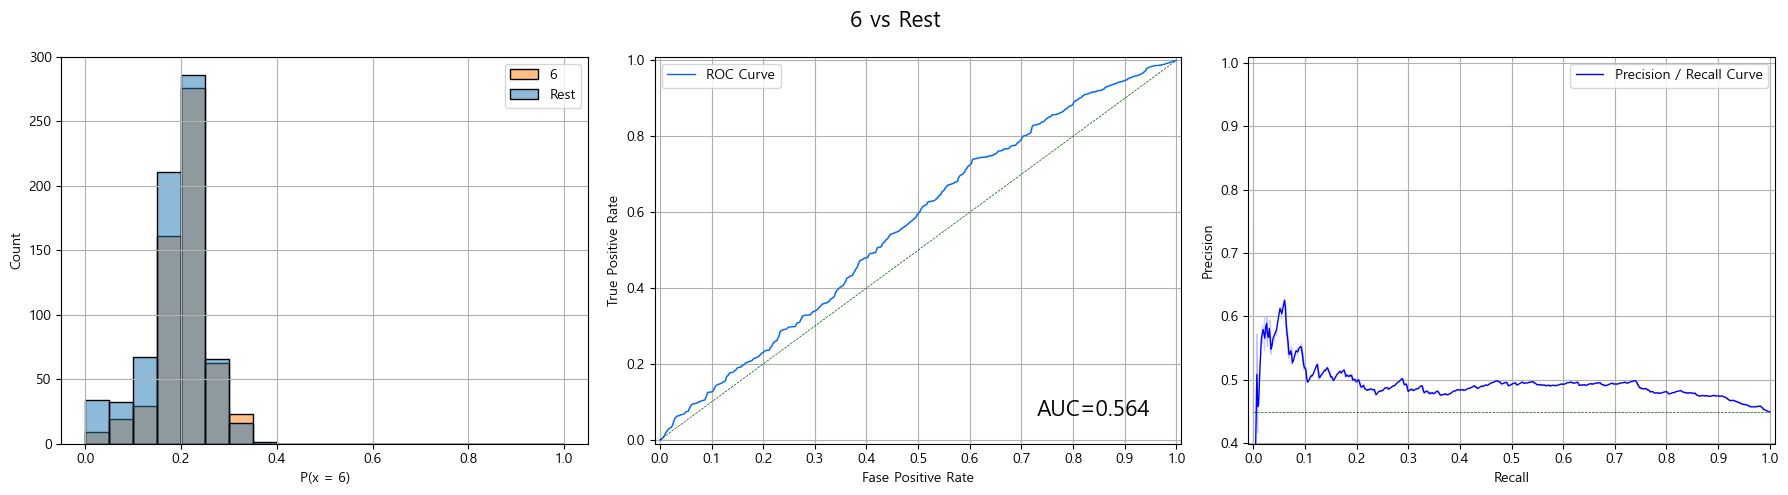

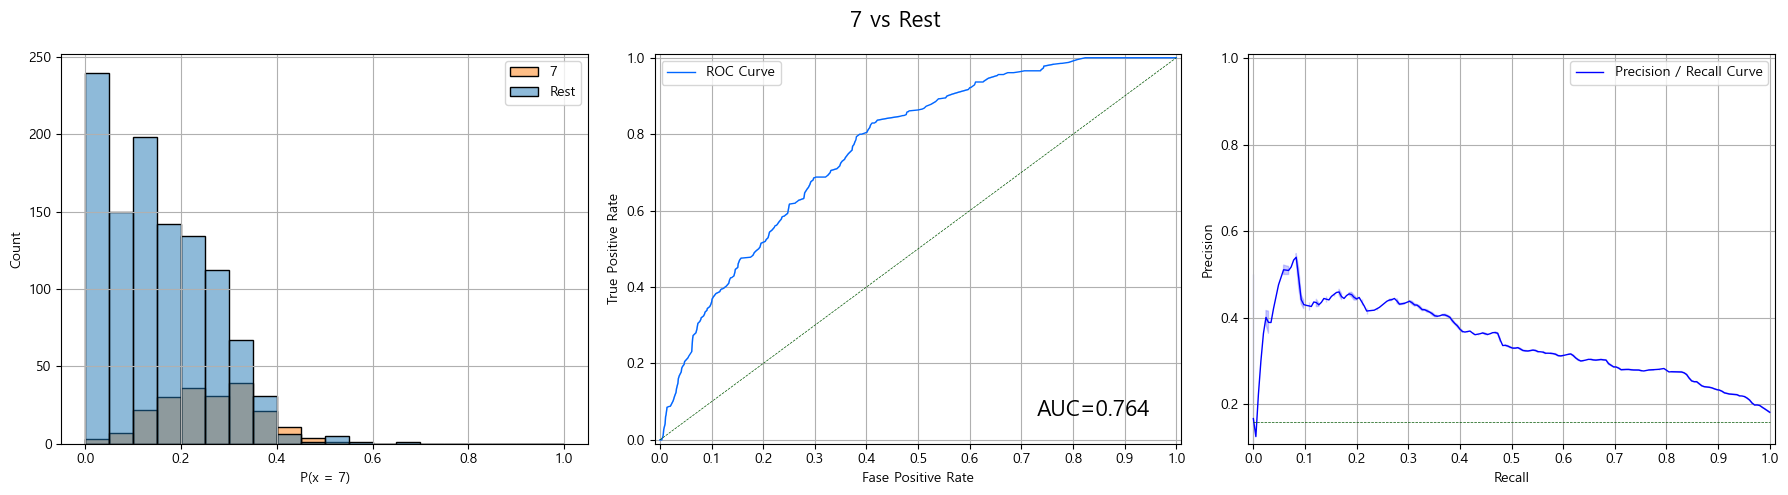

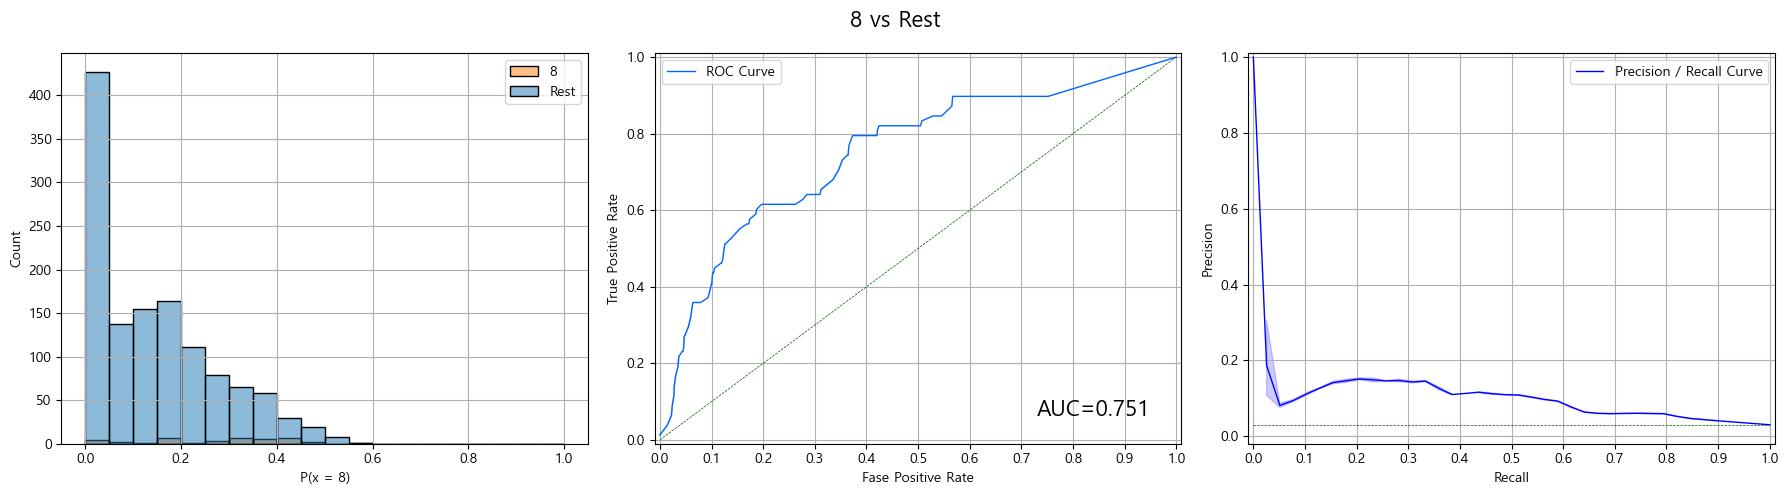

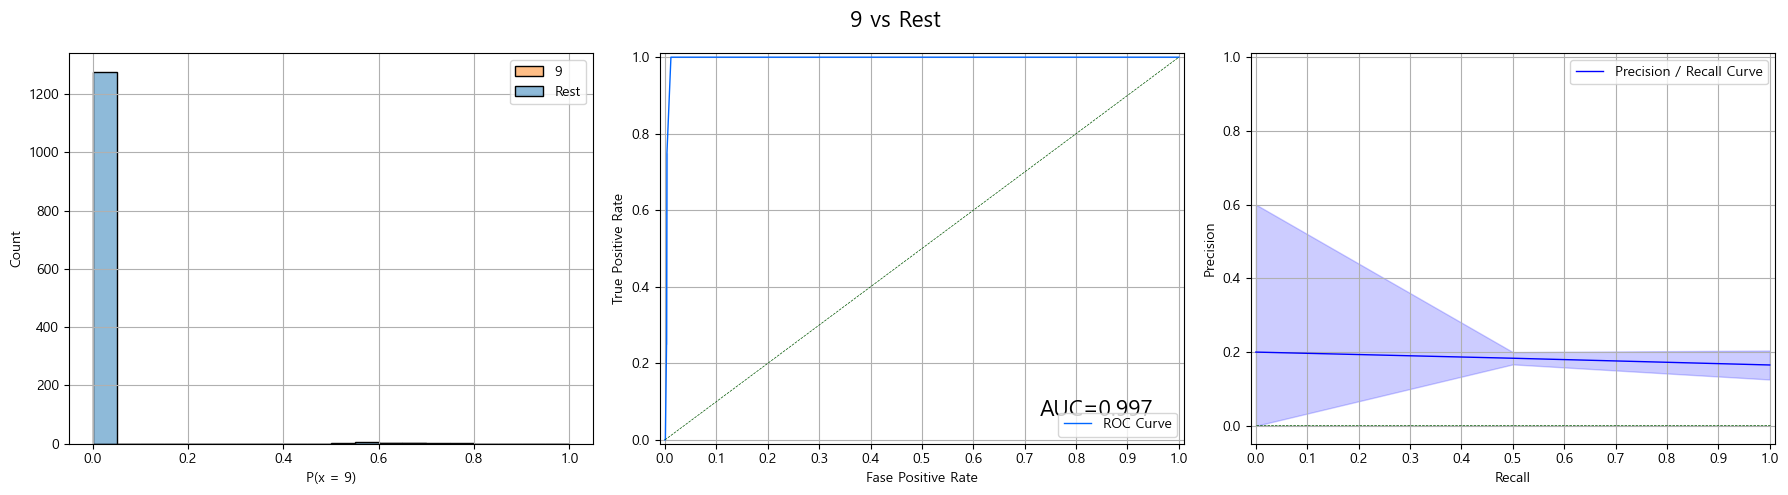

mean roc auc ovo: 0.7405

[학습곡선]


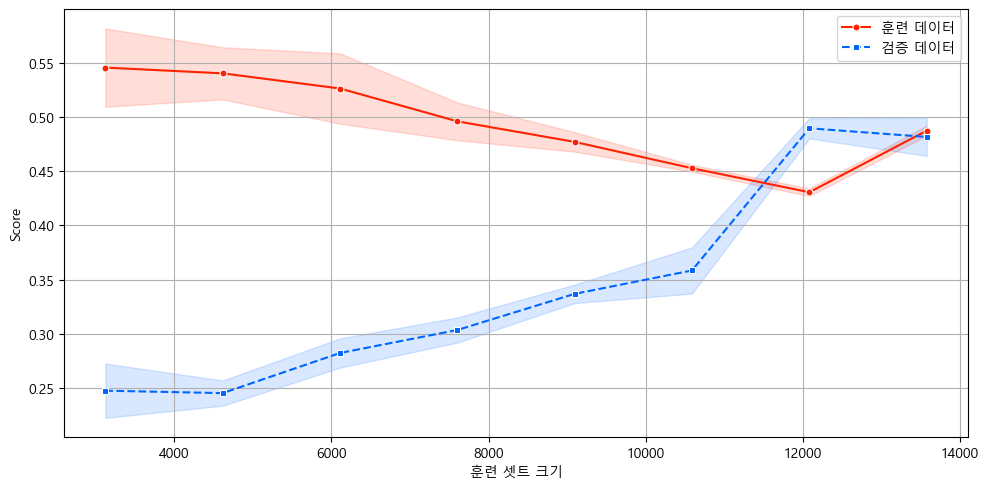

SGDClassifier(early_stopping=True, eta0=0.5, learning_rate='adaptive',
              loss='modified_huber', max_iter=3000, n_jobs=-1, penalty='l1',
              random_state=1234)

In [14]:
my_sgd_classification(x_over,y_over,x_test, y_test)

In [15]:
my_classification(x_over, y_over, x_test, y_test)

<LogisticRegression>(은)는 early_stopping를 허용하지 않음
LogisticRegression: {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
<KNeighborsClassifier>(은)는 random_state를 허용하지 않음
<KNeighborsClassifier>(은)는 early_stopping를 허용하지 않음
KNeighborsClassifier: {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
<SVC>(은)는 early_stopping를 허용하지 않음
SVC: {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
<GaussianNB>(은)는 n_jobs를 허용하지 않음
<GaussianNB>(은)는 random_state를 허용하지 않음
<GaussianNB>(은)는 early_stopping를 허용하지 않음
GaussianNB: {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
<DecisionTreeClassifier>(은)는 n_jobs를 허용하지 않음
<DecisionTreeClassifier>(은)는 early_stopping를 허용하지 않음
SGDClassifier: {'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'co

{'GaussianNB': GaussianNB(var_smoothing=1e-05),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3,
                      weights='distance'),
 'LogisticRegression': LogisticRegression(C=100, max_iter=1000, n_jobs=1, random_state=1234),
 'SVC': SVC(C=10, degree=2, n_jobs=-1, random_state=1234),
 'SGDClassifier': SGDClassifier(early_stopping=True, eta0=0.5, learning_rate='adaptive',
               loss='modified_huber', max_iter=2000, n_jobs=-1,
               random_state=1234),
 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=6.087662337662341e-05, random_state=1234)}